#   Bessel Processes Part III

The purpose of these notebooks (Bessel Processes Part I-III) is to provide an illustration of the [Bessel Processes](https://en.wikipedia.org/wiki/Bessel_process) and some of their main properties. 

- In Part I, we  introduce both Bessel and Squared Bessel processes with integer dimension $d\geq 2,$ and study some of its main properties. 
- In Part II, we show that Bessel processes with integer dimension satisfy certain Stochastic Differential Equations (SDEs). This representation allows us to extend them to the non-integer case.  
- Finally, in Part III we illustrate both Bessel and Squared Bessel processes with general dimension $\delta \geq 0$, and some of its main properties.

Before diving into the theory, let's start by loading the following libraries

-  [`aleatory`](https://github.com/quantgirluk/aleatory) 
-  `matplotlib`  

together with the style sheet [Quant-Pastel Light](https://github.com/quantgirluk/matplotlib-stylesheets). 

In [1]:
from aleatory.processes import BESProcess, BESQProcess
import matplotlib.pyplot as plt
mystyle = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(mystyle)
plt.rcParams["figure.figsize"] = (12,6)

These tools will help us to make insightful visualisations of Bessel processes.

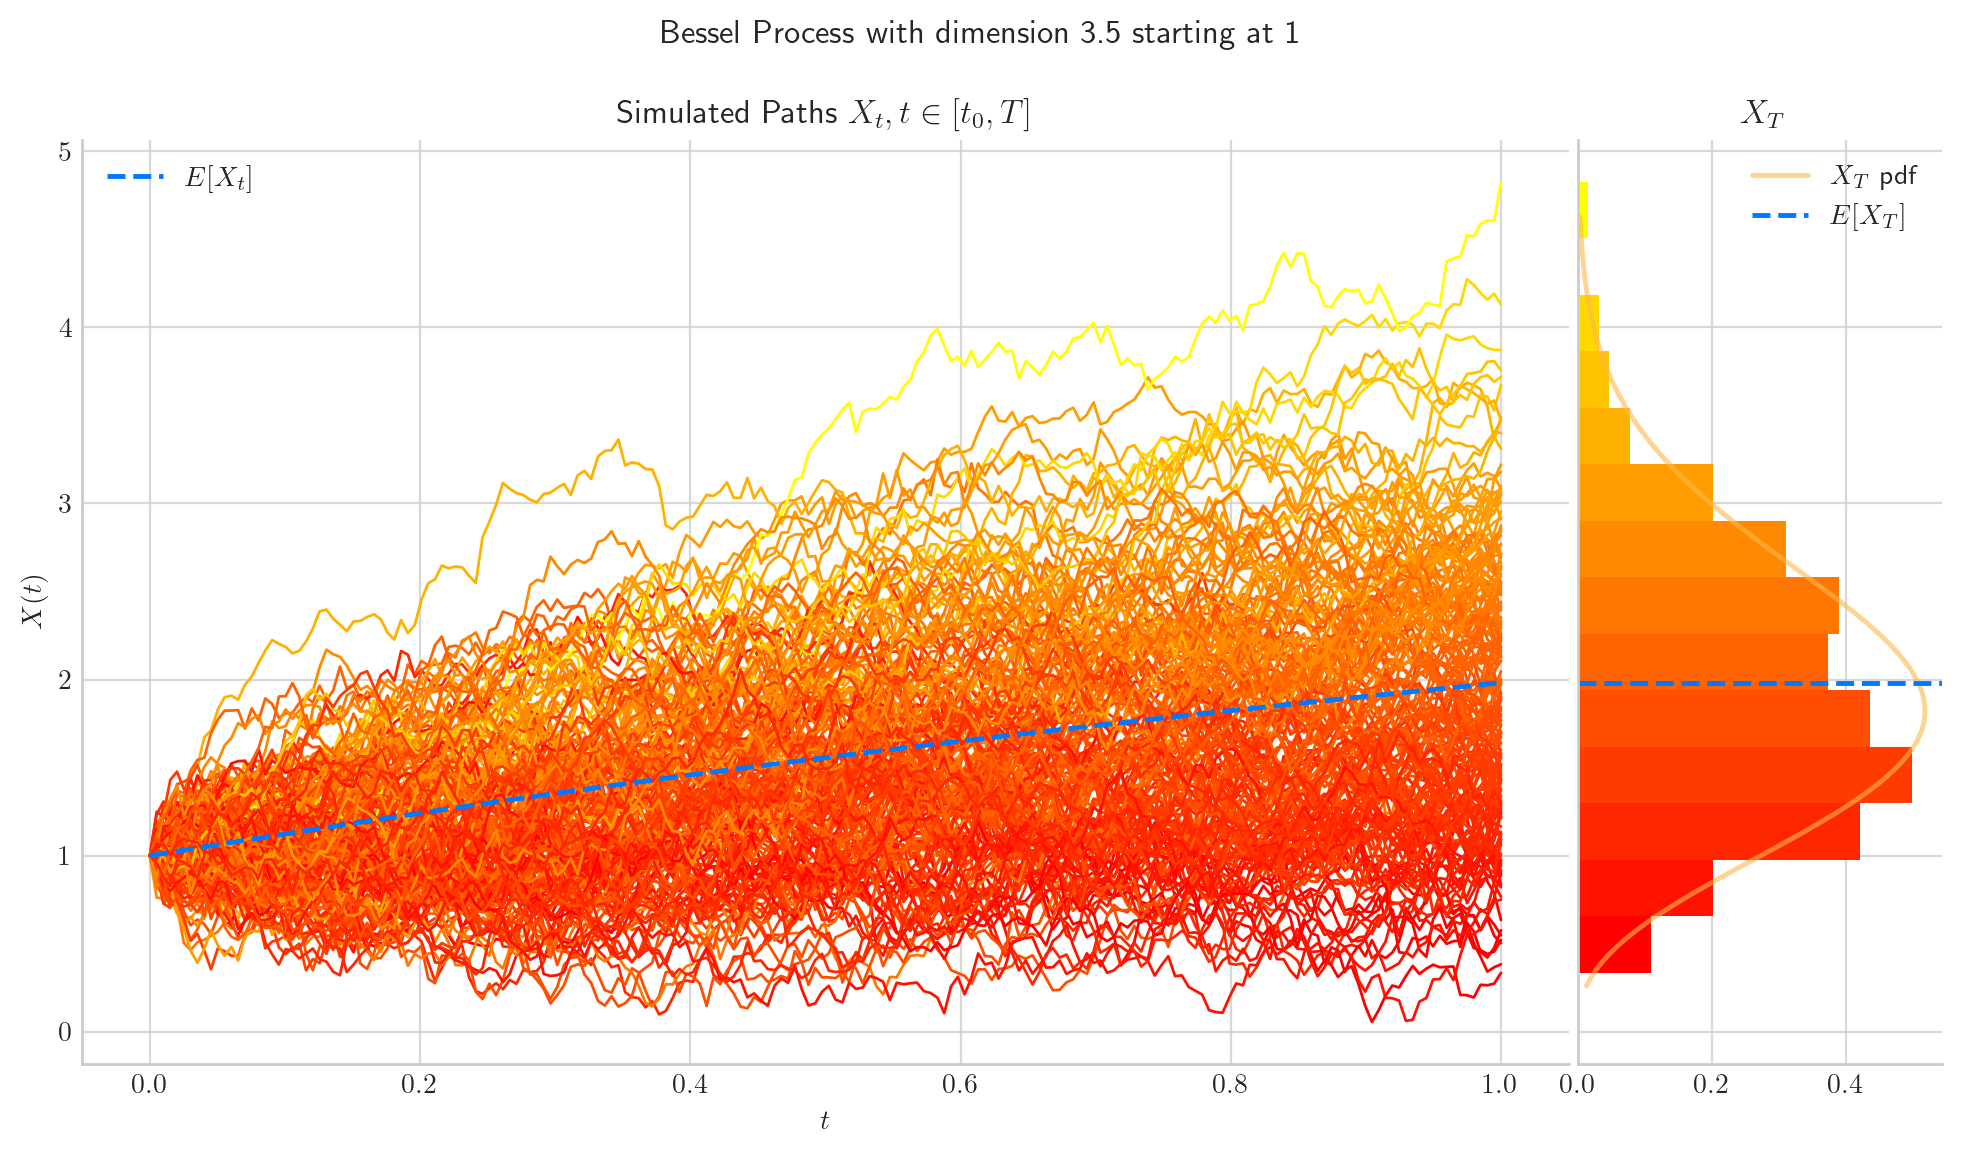

In [41]:
# from aleatory.processes import BESProcess
process = BESProcess(initial=1.0, dim=3.5)
fig = process.draw(n=200, N=200, envelope=False, colormap="autumn", title="Bessel Process with dimension 3.5 starting at 1")

## Definition

For every $\delta\geq 0$ and $x\geq 0$, a **Bessel process** with dimension $\delta$ started at $x$ is defined as the unique strong solution of the SDE

\begin{align}
X_t &= x +  \int_0^t\frac{\delta - 1}{2X_s} ds + B_t, \qquad t\geq 0,\\
\end{align}

and is denoted by $BES^{\delta}_{x}$. 

For every $\delta\geq 0$ and $y\geq 0$,  a **Squared Bessel process** with dimension $\delta$ started at $y$ is defined as the unique strong solution of the SDE

\begin{align}
Y_t &=  y +  \delta t + 2 \int_0^t \sqrt{ Y_t } dB_s,  \qquad t\geq 0, \\
\end{align}

and is denoted by $BESQ^{\delta}_y$. 

Bessel processes are frequently parameterised in terms of  the quantity

$$\nu  = \frac{\delta}{2} -1,$$

which is called **index** of the process. 

`````{admonition} Notation
:class: tip
Hereafter, we will use the following notation:  
- $BES^{\delta}_x$ or $BES^{(\nu)}_x$ : to denote a Bessel process of dimension $\delta$ started at $x$
- $BESQ^{\delta}_y$ or $BESQ^{(\nu)}_y$: to denote a Squared Bessel process of dimension $\delta$ started at $y$.

`````

### Transition Densities

For any $\delta >0$  (or equivalently $\nu>-1$) the  transition density $p_t^{(\nu)}$ of a Bessel process $BES^{(\nu)}$  is given by

\begin{equation}
p_t^{(\nu)}(x, u) = \dfrac{u}{t}\left(\dfrac{u}{x}\right)^{\nu}\exp\left(-\dfrac{x^2+u^2}{2t}\right)I_{\nu}\left(\dfrac{xu}{t} \right), \quad t>0, x>0,
\end{equation}



and the transition density $q_t^{(\nu)}$ of a Squared Bessel process $BESQ^{(\nu)}$  is given by

\begin{equation}
q_t^{(\nu)}(x, u) = \dfrac{1}{2t}\left(\dfrac{u}{x}\right)^{\frac{\nu}{2}}\exp\left(-\dfrac{x+u}{2t}\right)I_{\nu}\left(\dfrac{\sqrt{xu}}{t} \right),  \quad t>0, x>0,
\end{equation}


where $I_{\nu}$ is the usual [modified Bessel function](https://en.wikipedia.org/wiki/Bessel_function#Modified_Bessel_functions) with index $\nu$.

Note that 
\begin{equation*}
p_t^{\nu} (x,u) = 2y q_t^{\nu}(x^2, u^2).
\end{equation*}

## Marginal Distributions

The definition of the transition densities imply the following about the marginal distributions.


Given a **Bessel process** $X \sim BES_x^{(\nu)}$ the marginal distribution $X_t|X_0$ (denoted as $X_t$ for simplicity) has density function

\begin{equation}
f^{(\nu)}_{X_t}(u) = \dfrac{u}{t}\left(\dfrac{u}{x}\right)^{\nu}\exp\left(-\dfrac{x^2+u^2}{2t}\right)I_{\nu}\left(\dfrac{xu}{t} \right), \qquad t\geq 0.
\end{equation}

Thus, the marginal is a scaled non-central Chi random variable

\begin{equation}
X_t\sim  \sqrt{t} \chi \left(\delta, \frac{x}{\sqrt{t}} \right), \qquad  t\geq 0.
\end{equation}


Given a **Squared Bessel process** $Y\sim BESQ_y^{(\nu)}$ the marginal distribution $Y_t|Y_0$  (denoted as $Y_t$ for simplicity) has density function

\begin{equation}
f_{Y_t}^{(\nu)}(u) = \dfrac{1}{2t}\left(\dfrac{u}{y}\right)^{\frac{\nu}{2}}\exp\left(-\dfrac{y+u}{2t}\right)I_{\nu}\left(\dfrac{\sqrt{y u }}{t} \right), \qquad t\geq 0.
\end{equation}

Thus the marginal is a scaled non-central Chi squared random variable

\begin{equation}
Y_t \sim t \chi^2 \left(\delta, \frac{y}{t}\right), \qquad t\geq 0.
\end{equation}

#### Visualisation 

To visualise these probability density functions in `Python`, we can use the method `get_marginal` from the `aleatory` library. Let's consider a Bessel process `BESProcess(dim=3.5, initial=1.0)` and plot the density function of the marginal $X_1$

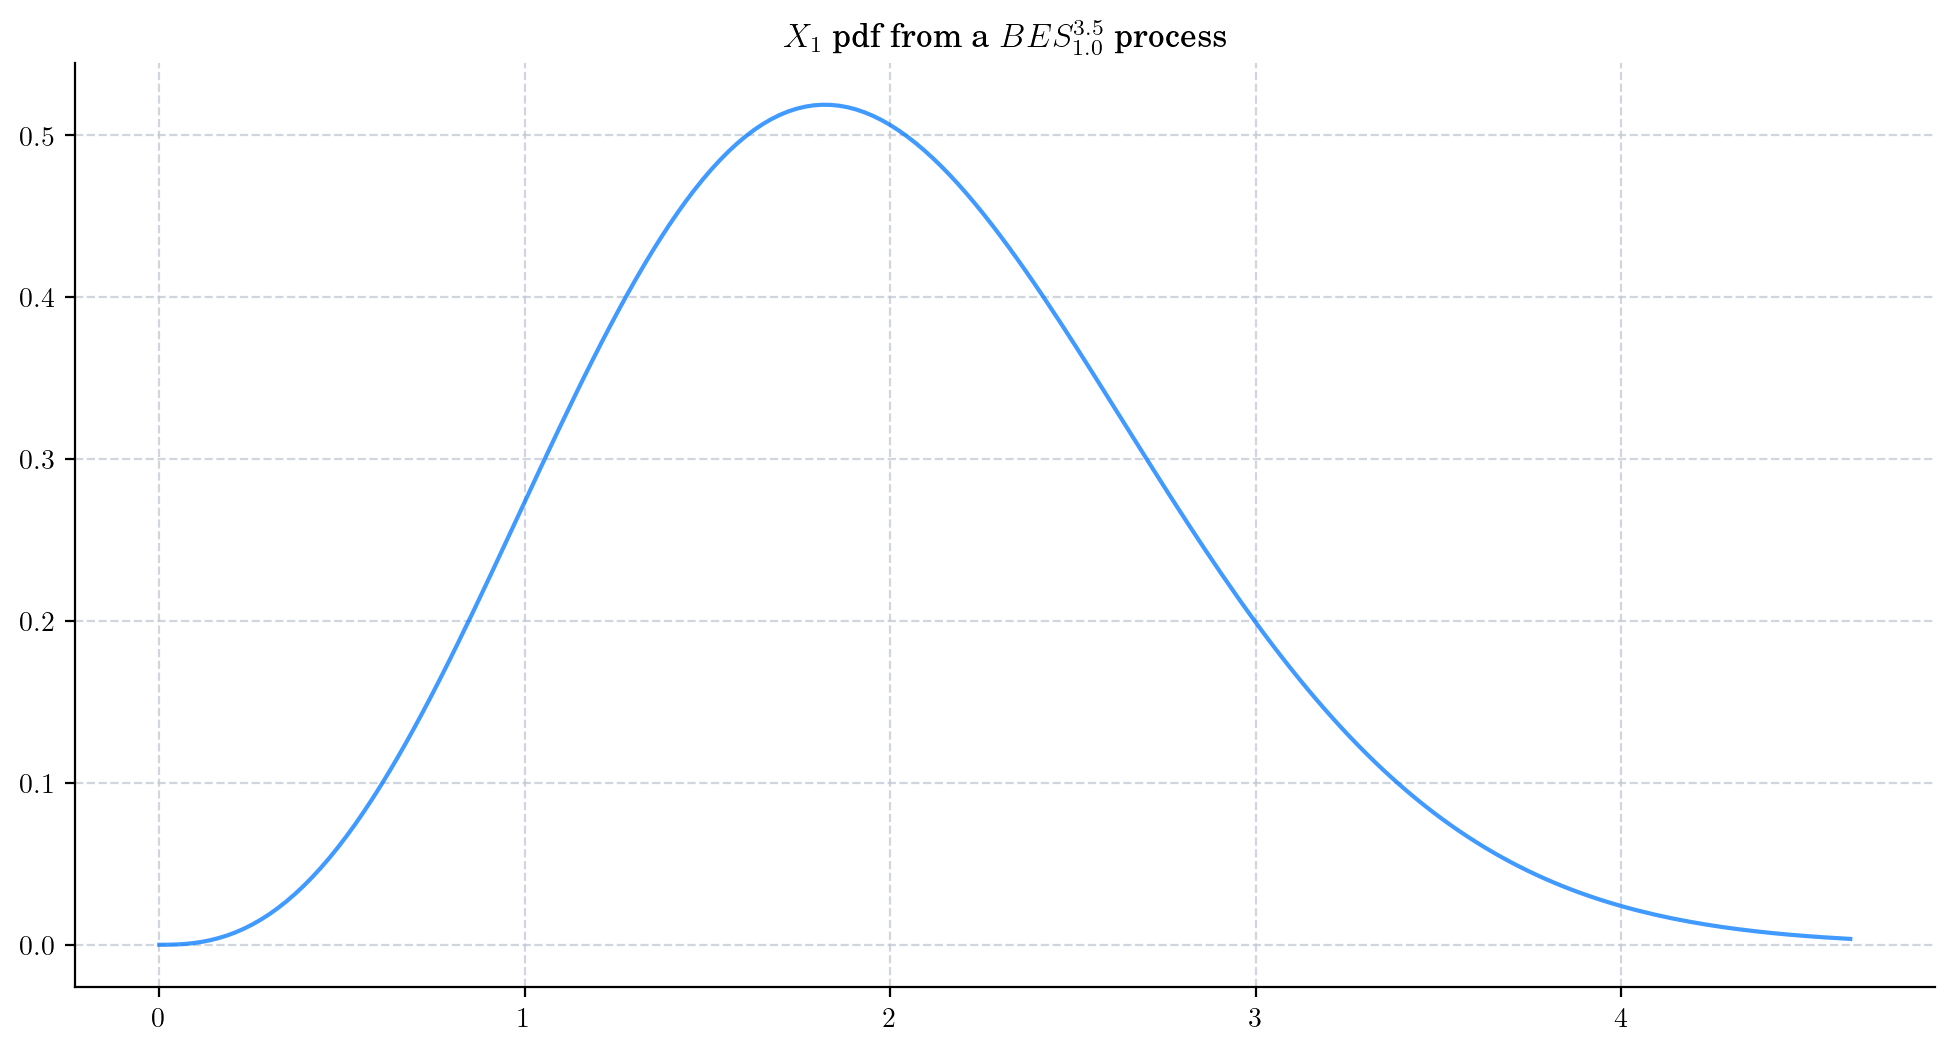

In [13]:
# from aleatory.processes import BESProcess
import numpy as np
process = BESProcess(dim= 3.5, initial=1.0)
X_1 = process.get_marginal(t=1)
x = np.linspace(0, X_1.ppf(0.999), 200)
plt.plot(x, X_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$X_1$ pdf from a ' + process.name + ' process')
plt.show()

Similarly, we can take a Squared Bessel process `BESQProcess(dim=3.5, initial=1.0)` and plot the density function of $Y_1$.

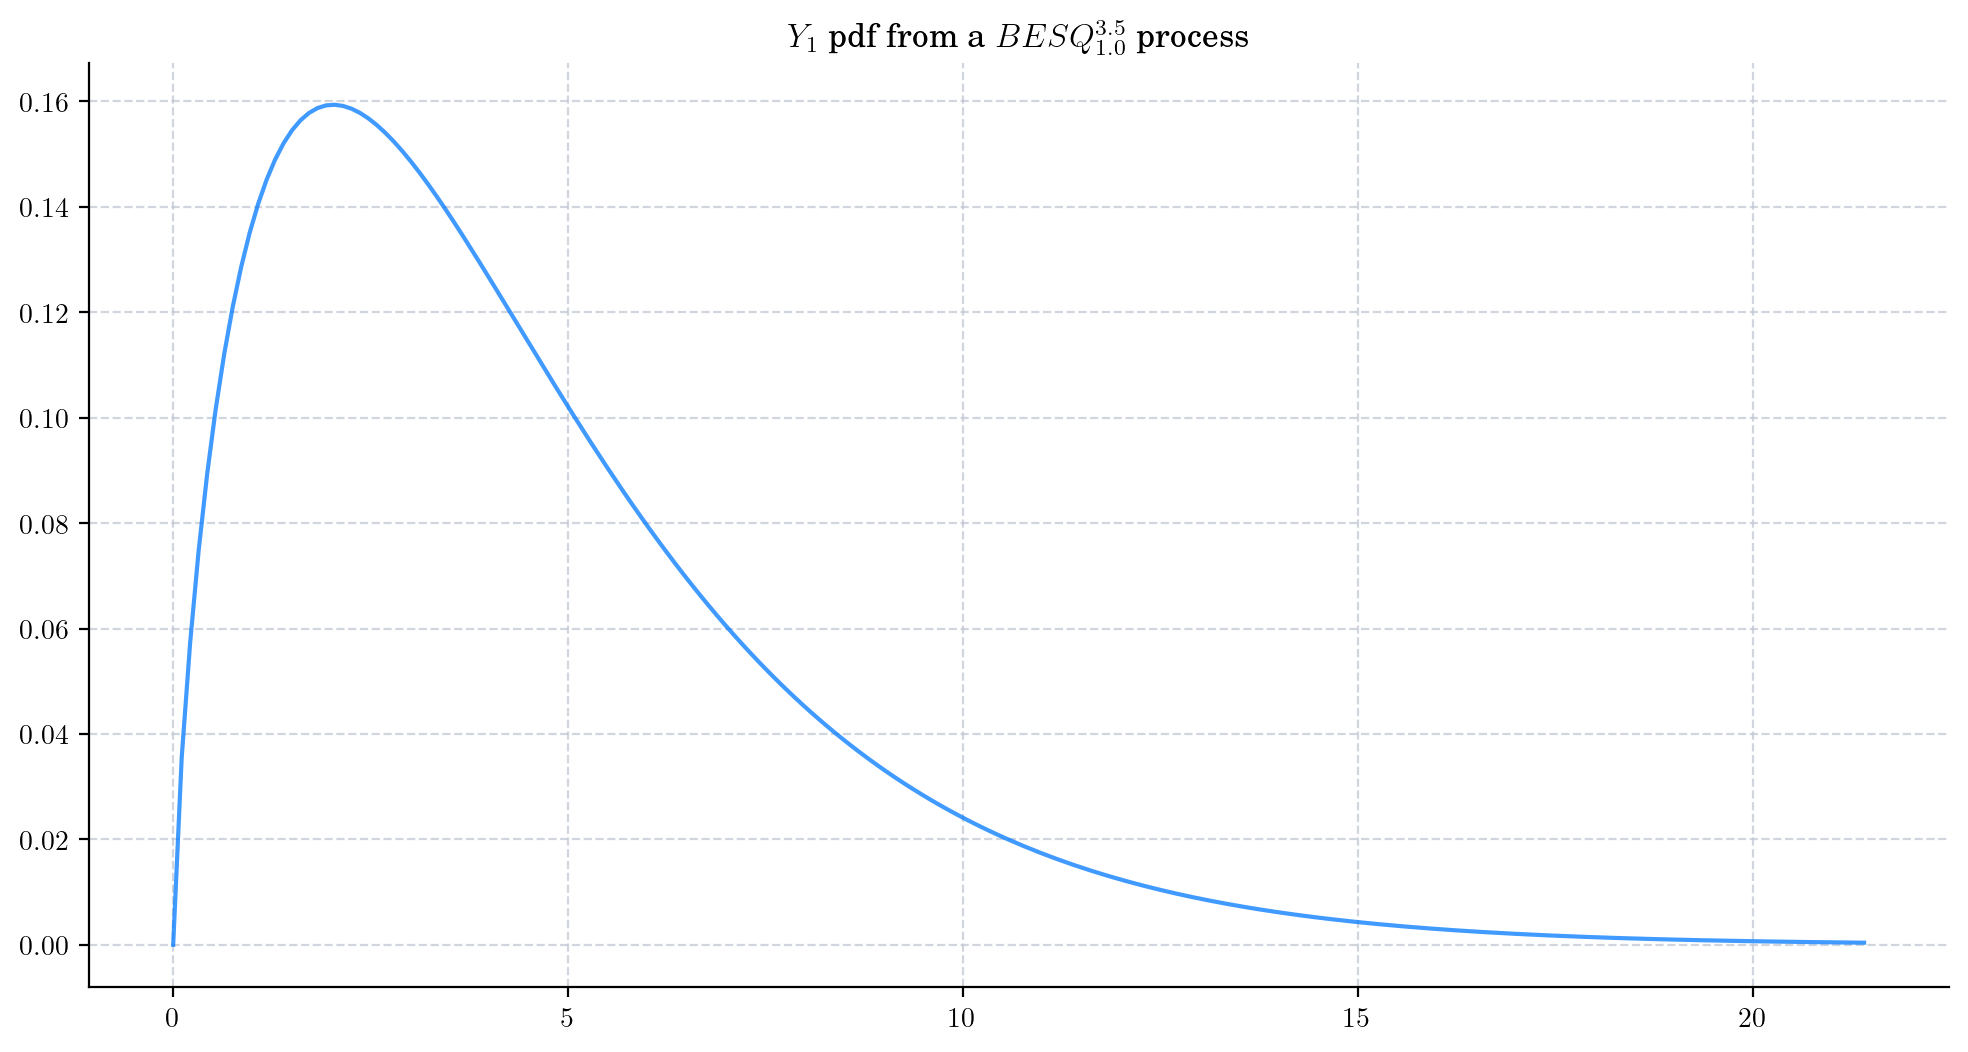

In [14]:
# from aleatory.processes import BESQProcess
process = BESQProcess(dim= 3.5, initial=1.0)
Y_1 = process.get_marginal(t=1)
y = np.linspace(0, Y_1.ppf(0.999), 200)
plt.plot(y, Y_1.pdf(y), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$Y_1$ pdf from a ' + process.name + ' process')
plt.show()

Next, we vary the value of the dimension $\delta$ and plot the corresponding pdfs. As the dimension increases:

-  The density from the Bessel marginal moves towards the right and becomes more symmetric. 
-  The density from the Squared Bessel marginal also move towards the right, it becomes wider and its shape changes as well. 

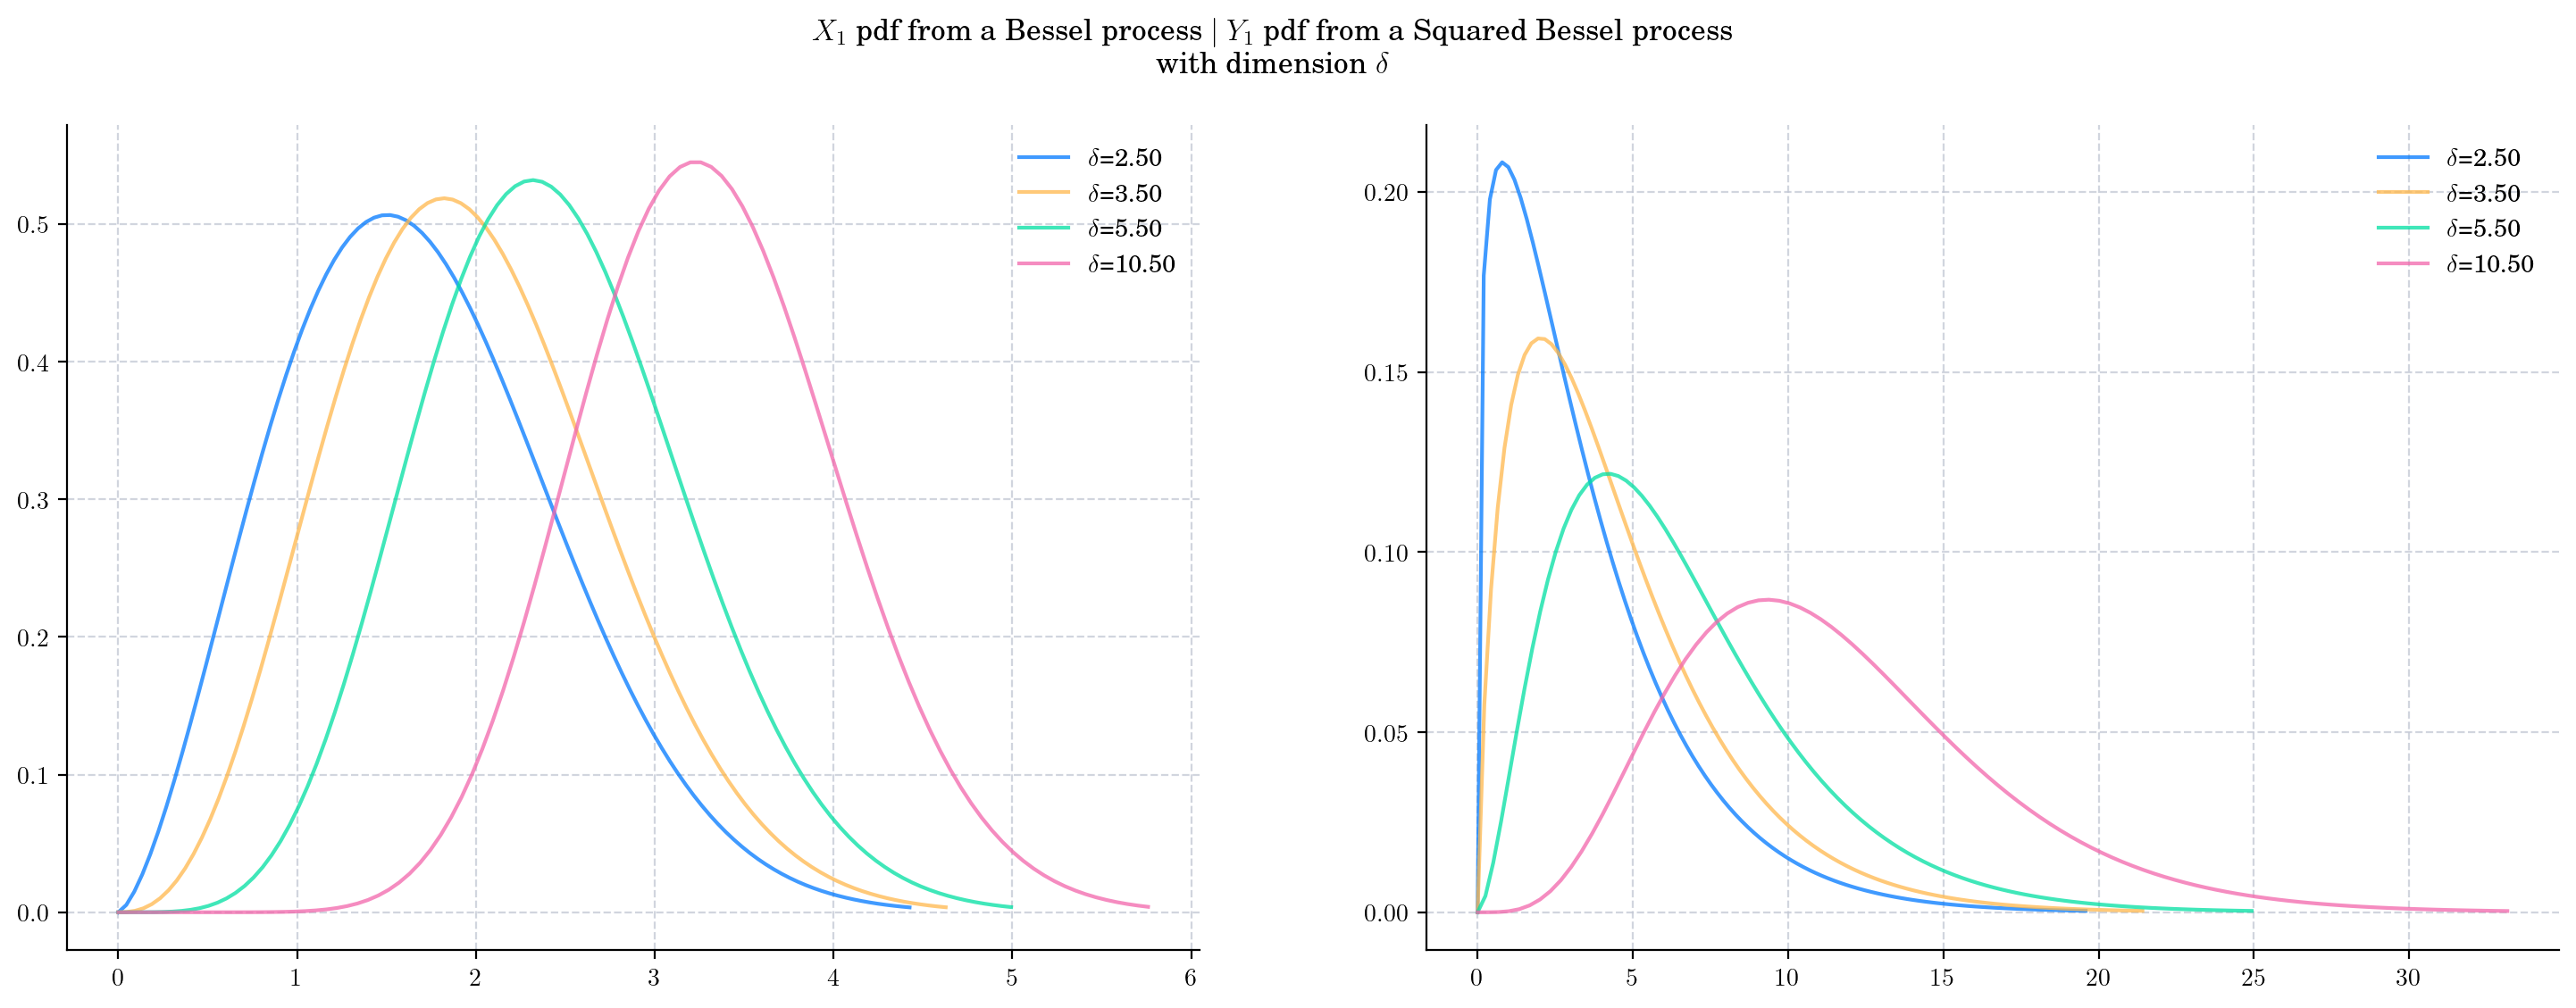

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
dims = [2.5, 3.5, 5.5, 10.5]
for d in dims:
    processes = [BESProcess(dim=d, initial=1.0), BESQProcess(dim=d, initial=1.0)]
    for (process, ax) in zip(processes, axs):
        X_t = process.get_marginal(t=1.0)
        x = np.linspace(0, X_t.ppf(0.999), 100)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$\delta$={d:.2f}')
        ax.legend()
fig.suptitle(f'$X_1$ pdf from a Bessel process $\mid$  $Y_1$ pdf from a Squared Bessel process\n with dimension $\delta$')
plt.show()

Now, we fix the dimension to $\delta =3.5$ vary the value of the initial condition and plot the corresponding pdfs. As the initial condition increases:

-  The density from the Bessel marginal moves towards the right and becomes less leptokurtic   
-  The density from the Squared Bessel margina becomes wider and more symmetric.

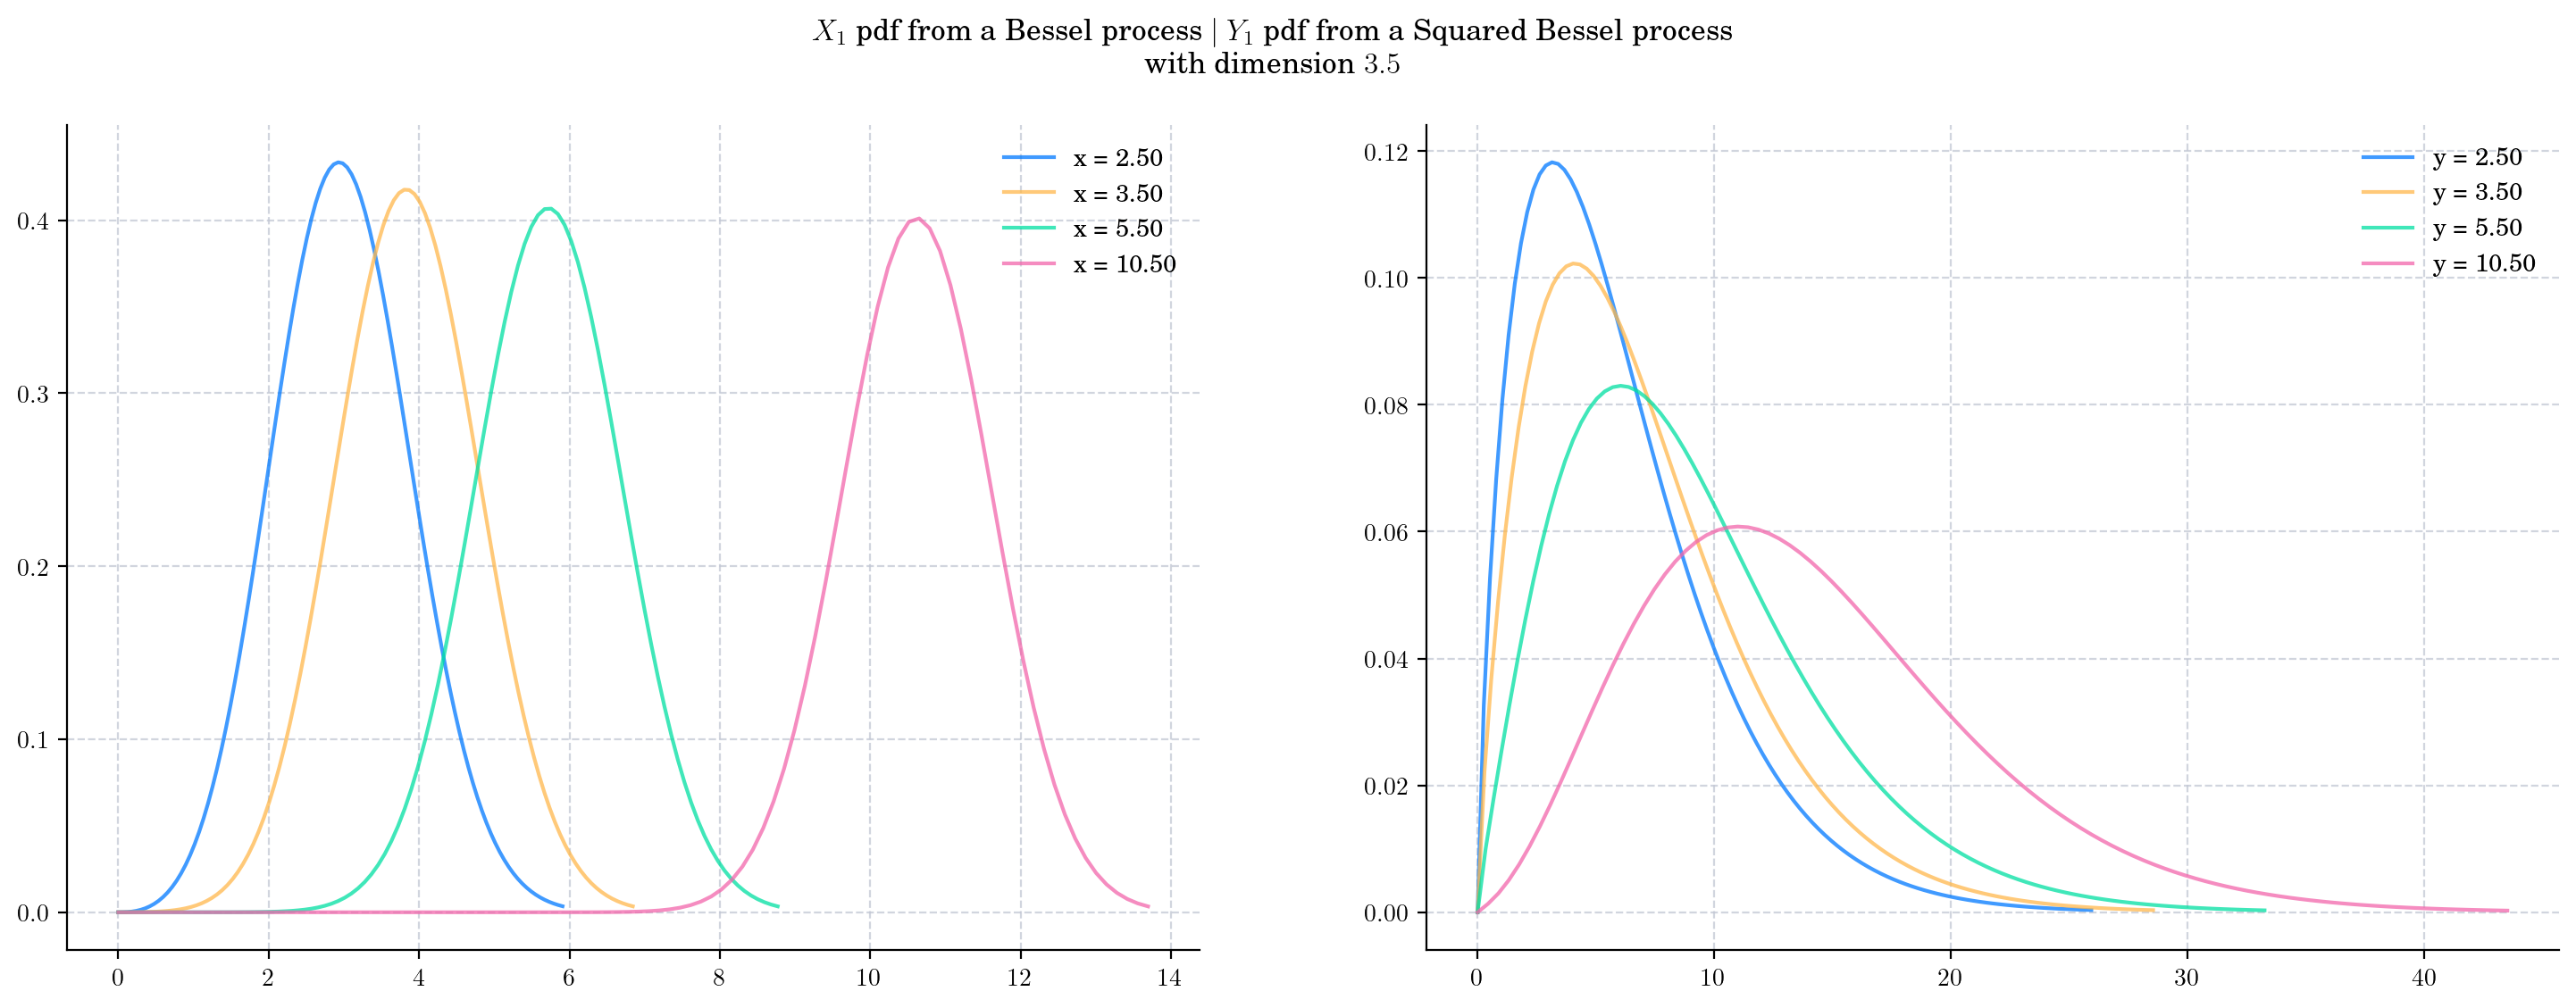

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
initials = [2.5, 3.5, 5.5, 10.5]
delta = 3.5
for initial in initials:
    processes = [BESProcess(dim=delta, initial=initial), BESQProcess(dim=delta, initial=initial)]
    for (process, ax, labl) in zip(processes, axs, ['x', 'y']):
        X_t = process.get_marginal(t=1.0)
        x = np.linspace(0, X_t.ppf(0.999), 100)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5, alpha=0.75, label=f'{labl} = {initial:.2f}')
        ax.legend()
fig.suptitle(f'$X_1$ pdf from a Bessel process $\mid$  $Y_1$ pdf from a Squared Bessel process\n with dimension $3.5$')
plt.show()

Finally, we fix both the dimension and the initial condition and vary the value of time $t$  and plot the corresponding pdfs. As $t$ increases:

-  The density from the Bessel marginal moves towards the right and becomes wider.
-  The density from the Squared Bessel marginal becomes wider very rapidly as $t$ grows. 

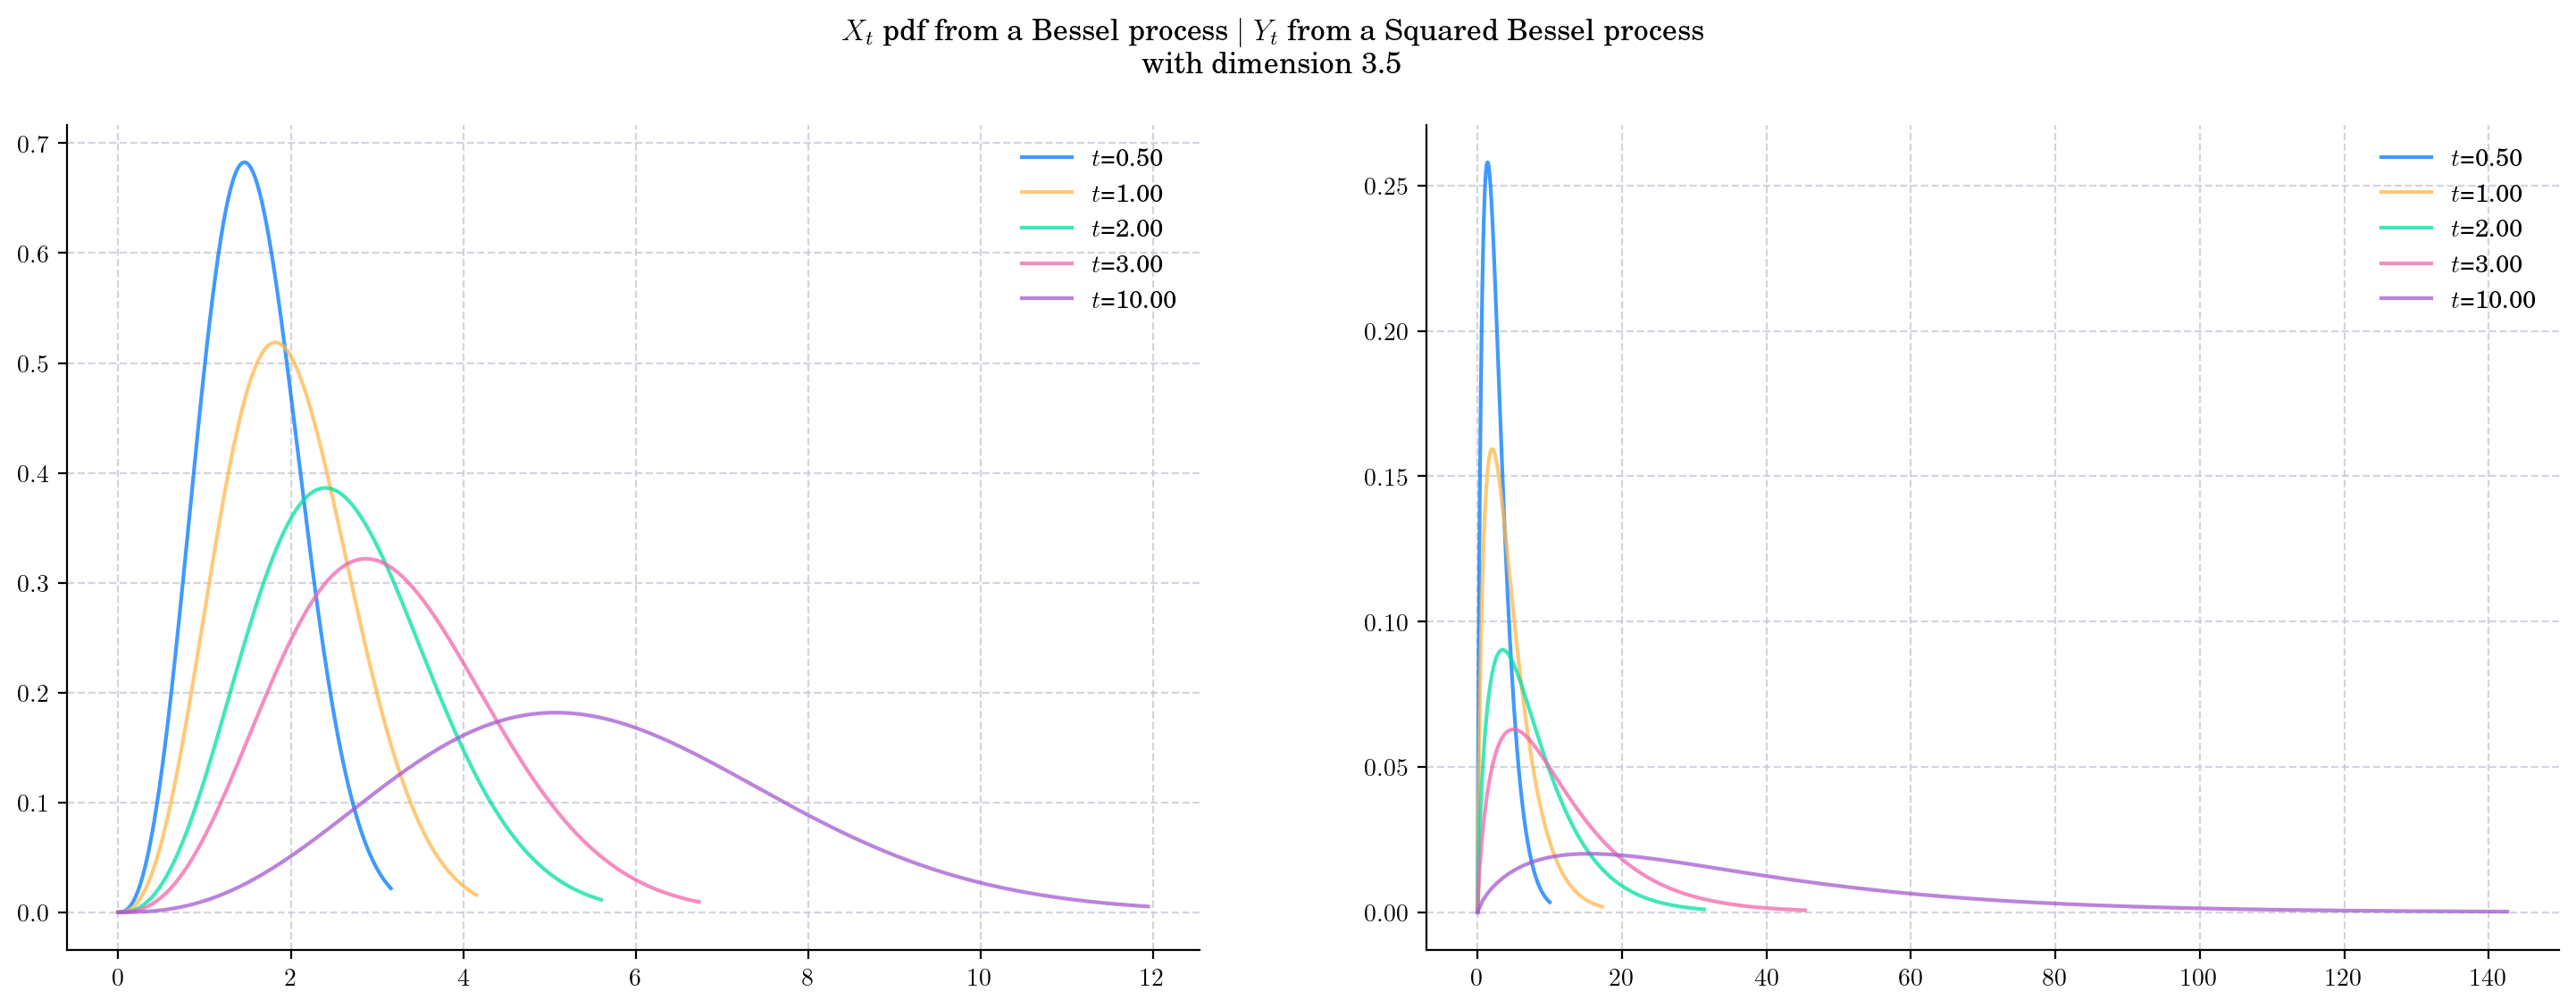

In [18]:
d = 3.5
initial = 1.0 
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
t_values = [0.5,1, 2, 3, 10]

processes = [BESProcess(dim=d, initial=initial), BESQProcess(dim=d, initial=initial)]

for (process, ax) in zip(processes, axs):
        for t in t_values: 
                X_t = process.get_marginal(t=t)
                x = np.linspace(0, X_t.ppf(0.995), 200)
                ax.plot(x, X_t.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={t:.2f}')
                ax.legend()
fig.suptitle(f'$X_t$ pdf from a Bessel process $\mid$ $Y_t$ from a Squared Bessel process\n with dimension 3.5')
plt.show()

### Expectation and Variance


#### Bessel
For each $t>0$, the  marginal distribution $X_t|X_0=x$ from a Bessel process $BES_x^{\delta}$ satisfies

\begin{equation*}
\mathbf{E}[X_t] =  \sqrt{t}\sqrt{ \dfrac{\pi}{2}} L_{\frac{1}{2}}^{\nu} \left( \dfrac{-x^2}{2t}\right),
\end{equation*}

where $L_{\frac{1}{2}}^{\nu}$ denotes the generalised Laguerre polynomial; and

\begin{equation*}
\mathbf{Var} [X_t ] = t \left(\delta + \frac{x^2}{t} \right) - \mu^2 ,
\end{equation*}

where $\mu = \mathbf{E}[X_t]$.

Clearly, the  expression for the variance coincide with the one from [Bessel Processes Part I](https://quantgirluk.github.io/Understanding-Quantitative-Finance/bessel_processes_part1.html) when $x=0$ and $\delta$ is integer.  To see that the same is true for the expectation, one should note that the Laguerre polynomials satisfy

$$L_{\frac{1}{2}}^{\nu}(0) =  \dfrac{\Gamma(1/2 + \delta/2  ) }{ (1/2)! \Gamma(\delta/2 ) } =  2 \dfrac{\Gamma(\frac{\delta+1}{2}  ) }{ \sqrt{\pi} \Gamma(\frac{\delta}{2} )}.$$

##### Python Implementation

We can use the method `get_marginal` to obtain the marginal distribution and the get its mean and variance

In [27]:
from aleatory.processes import BESProcess
delta = 3.5
x = 1.0
t = 2
bes = BESProcess(dim=delta, initial=x)
marginal = bes.get_marginal(t=t)
print(marginal.mean())
print(marginal.var())

2.637800835969429
1.0420067497589818


#### Squared Bessel

For each $t>0$, the conditional marginal $Y_t|Y_0=y$ from a Squared Bessel process $BESQ_y^{\delta}$ satisfies

\begin{equation*}
\mathbf{E}[Y_t] = t \left(\delta + \frac{y}{t} \right),
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [Y_t ] = 2 t^2 \left(\delta + 2\frac{y}{t} \right).
\end{equation*}

Clearly, these  expressions coincide with the ones from [Bessel Processes Part I](https://quantgirluk.github.io/Understanding-Quantitative-Finance/bessel_processes_part1.html) when $x=0$ and $\delta$ is integer.

##### Python Implementation
For given $\delta, y, t\geq 0$, we can implement the above formulas for the expectation, and variance, as follows. 

In [30]:
delta = 3.5
y = 1.0
t= 2.0

expectation = t*(delta + y/t)
variance = (2.0*t**2)*(delta + 2.0*y/t)

print(f'For d={d}' , f't={t}', sep=", ")
print(f'E[X_t] = {expectation: .6f}')
print(f'Var[X_t] = {variance :.6f}')

For d=3.5, t=2.0
E[X_t] =  8.000000
Var[X_t] = 36.000000


We can also use the method `get_marginal` to obtain the marginal distribution and the get its mean and variance

In [31]:
# from aleatory.processes import BESProcess
delta = 3.5
y = 1.0
t = 2.0
bes = BESQProcess(dim=delta, initial=y)
marginal = bes.get_marginal(t=t)
print(marginal.mean())
print(marginal.var())

8.0
36.0


## Long Time Behaviour


### Expectation and Variance 

#### Bessel


The conditional marginal from a Bessel process $BES_x^{\delta}$, satisfies

\begin{equation*}
\lim_{t\rightarrow \infty }\mathbf{E}[X_t] =  \lim_{t\rightarrow \infty }  \sqrt{t}\sqrt{ \dfrac{\pi}{2}} L_{\frac{1}{2}}^{\nu} \left( \dfrac{-x^2}{2t}\right) = \infty,
\end{equation*}

and

\begin{equation*}
\lim_{t\rightarrow \infty } \mathbf{Var} [X_t ] =  \lim_{t\rightarrow \infty }  t \left(\delta + \frac{x^2}{t} \right) - \left(\sqrt{t}\sqrt{ \dfrac{\pi}{2}} L_{\frac{1}{2}}^{\nu} \left( \dfrac{-x^2}{2t}\right)  \right)^2  = \infty.
\end{equation*}

That is, both the mean and the variance tend to infinity as $t$ grows. Besides, these expressions imply that the variance grows faster (at linear rate with respect to $t$) than the mean. The next plot illustrates these observations.

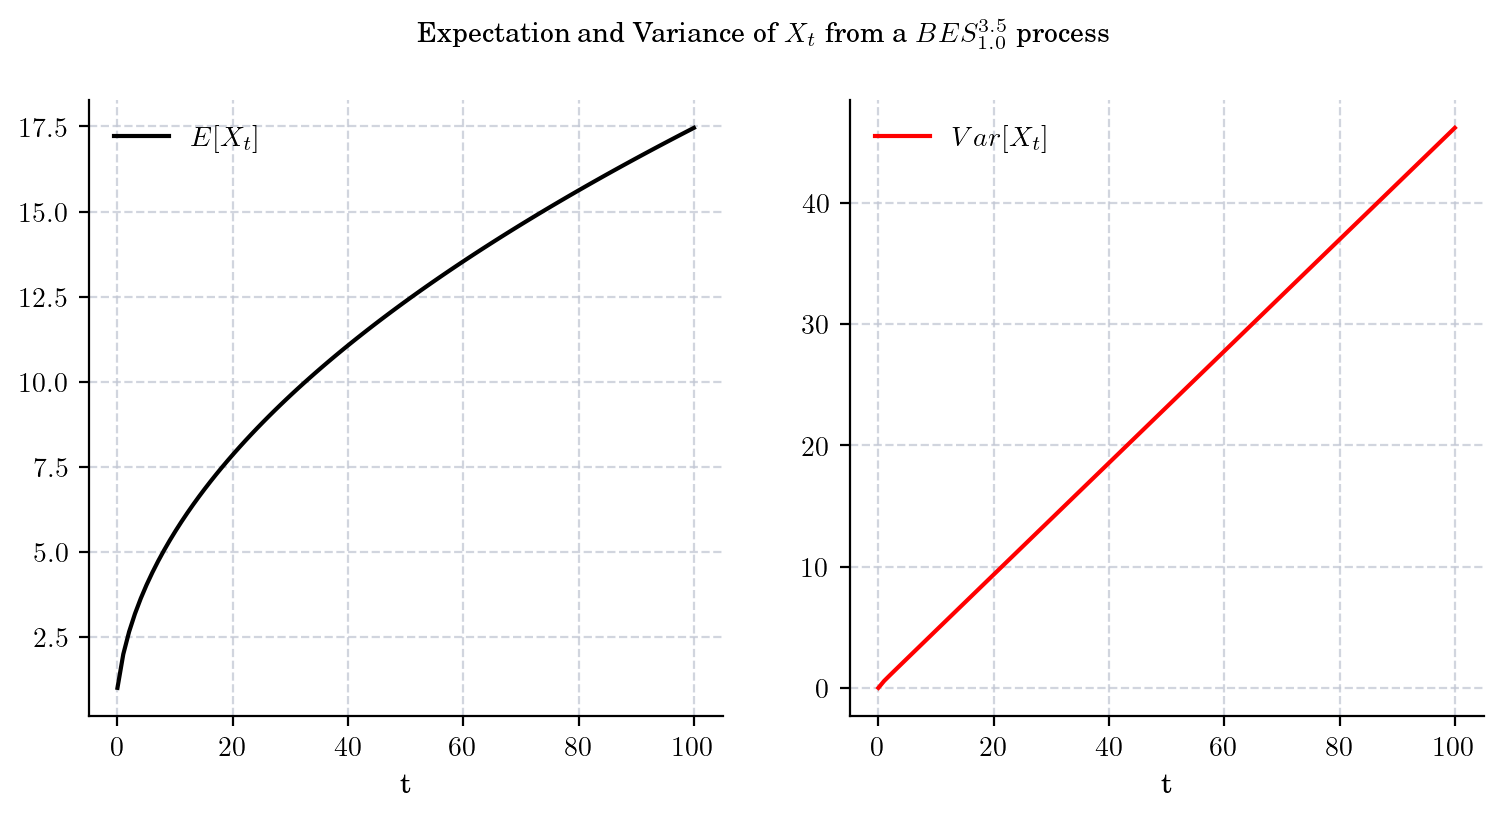

In [42]:
def draw_mean_variance(delta=3.5, x=1.0,  T=100):
    process = BESProcess(dim=delta, initial=x, T=T)
    ts = np.linspace(0, T, T)
    means = process.marginal_expectation(ts)
    variances = process.marginal_variance(ts)
    fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(9, 4))
    
    ax1.plot(ts, means, lw=1.5, color='black', label='$E[X_t]$')
    ax1.set_xlabel('t')
    ax1.legend()
    ax2.plot(ts,  variances, lw=1.5, color='red', label='$Var[X_t]$')
    ax2.set_xlabel('t')
    ax2.legend()
    fig.suptitle(
        'Expectation and Variance of $X_t$ from a ' + process.name + ' process', size=10)
    plt.show()
    
draw_mean_variance(delta=3.5, x =1.0, T=100)

#### Squared Bessel

The conditional marginal from a Squared Bessel process $BESQ_0^d$, with integer dimension $d\geq 2$, satisfies

\begin{equation*}
\lim_{t\rightarrow \infty }\mathbf{E}[Y_t] =  \lim_{t\rightarrow \infty } t \left(\delta + \frac{y}{t} \right)  = \infty,
\end{equation*}

and

\begin{equation*}
\lim_{t\rightarrow \infty } \mathbf{Var} [Y_t ] =  \lim_{t\rightarrow \infty } 2 t^2 \left(\delta + 2\frac{y}{t} \right) = \infty.
\end{equation*}

That is, both the mean and the variance tend to infinity as $t$ grows. Besides, from these equations we can conclude that the variance grows faster than the mean.  The next plot illustrates these observations.

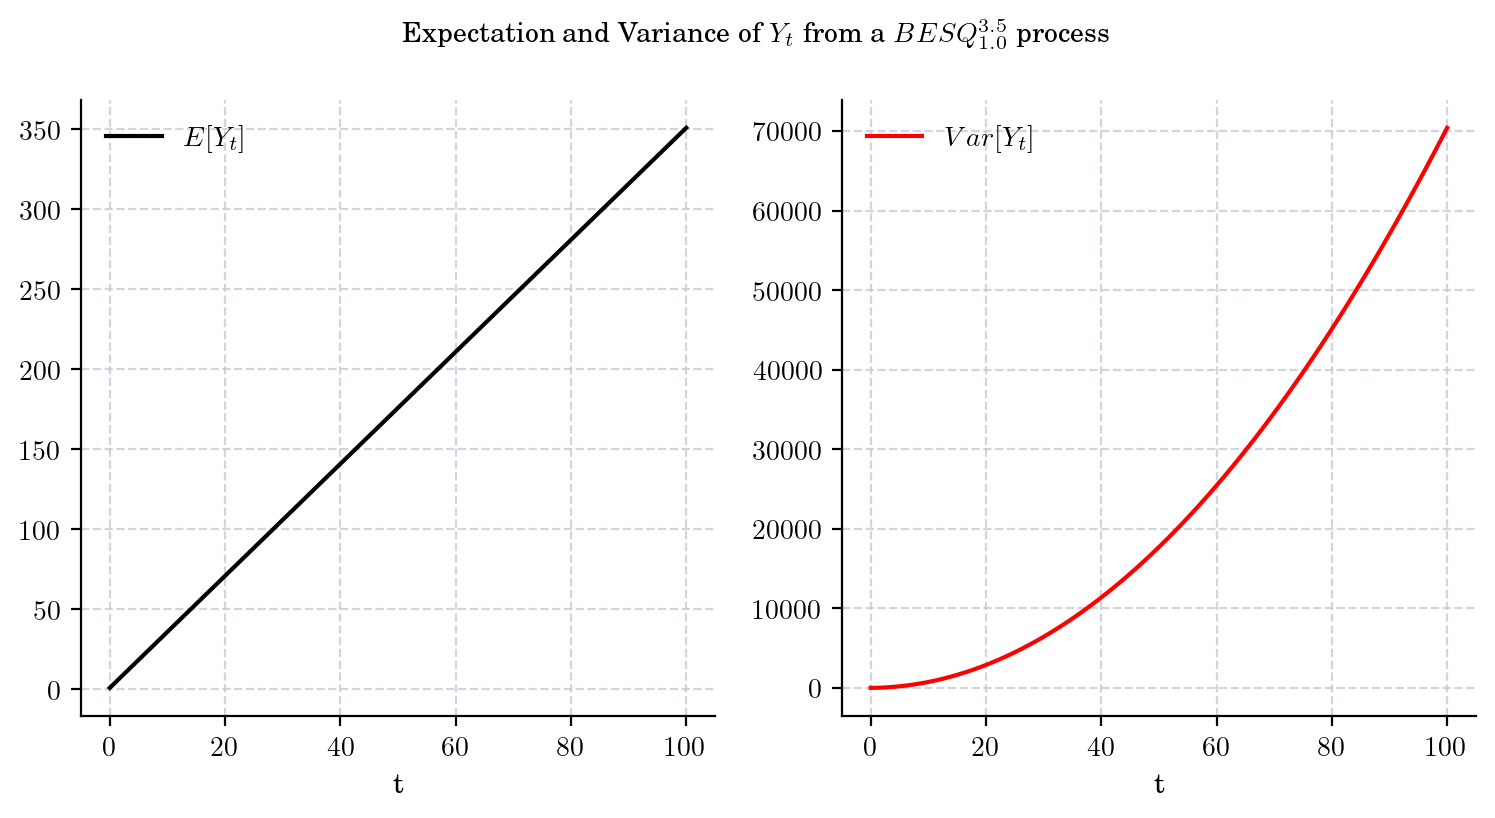

In [43]:
def draw_mean_variance(dim=3,initial=1.0, T=100):

    process = BESQProcess(dim=dim, initial=initial, T=T)
    ts = np.linspace(0.00001, T, T)
    means = process.marginal_expectation(ts)
    variances = process.marginal_variance(ts)
    fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(9, 4))
    
    ax1.plot(ts, means, lw=1.5, color='black', label='$E[Y_t]$')
    ax1.set_xlabel('t')
    ax1.legend()
    ax2.plot(ts,  variances, lw=1.5, color='red', label='$Var[Y_t]$')
    ax2.set_xlabel('t')
    ax2.legend()
    fig.suptitle(
        'Expectation and Variance of $Y_t$ from a ' + process.name + ' process', size=10)
    plt.show()
    
draw_mean_variance(dim=3.5, initial=1.0, T=100)

## Simulation

Knowing  the distribution of the marginals allows us to simulate paths from Bessel and Squared Bessel processes.


To simulate several paths from Bessel and Squared Bessel processes and visualise them we can use the methods `simulate` and `plot` from the `aleatory` library. 


`````{admonition} Tip
:class: tip
Remember that  the number of points in the partition is defined by the parameter $n$, while  the number of paths is determined by $N$.
`````


Let’s start by simulating 5 paths from a Bessel Process of dimension 3.5 started at 1.0, over the interval $[0,1]$ using a partition of 100 points. The following snippet shows how to do this by calling the method `simulate` which returns a list containing the paths as  `numpy` array objects.



In [46]:
# Snippet to Simulate N paths from the Bessel process
from aleatory.processes import BESProcess
bes = BESProcess(dim= 3.5, initial=1.0)
paths = bes.simulate(n=100, N=5)

If we want to simulate and create a simple visualision of the paths, we can use the method `plot` from the `aleatory` library.

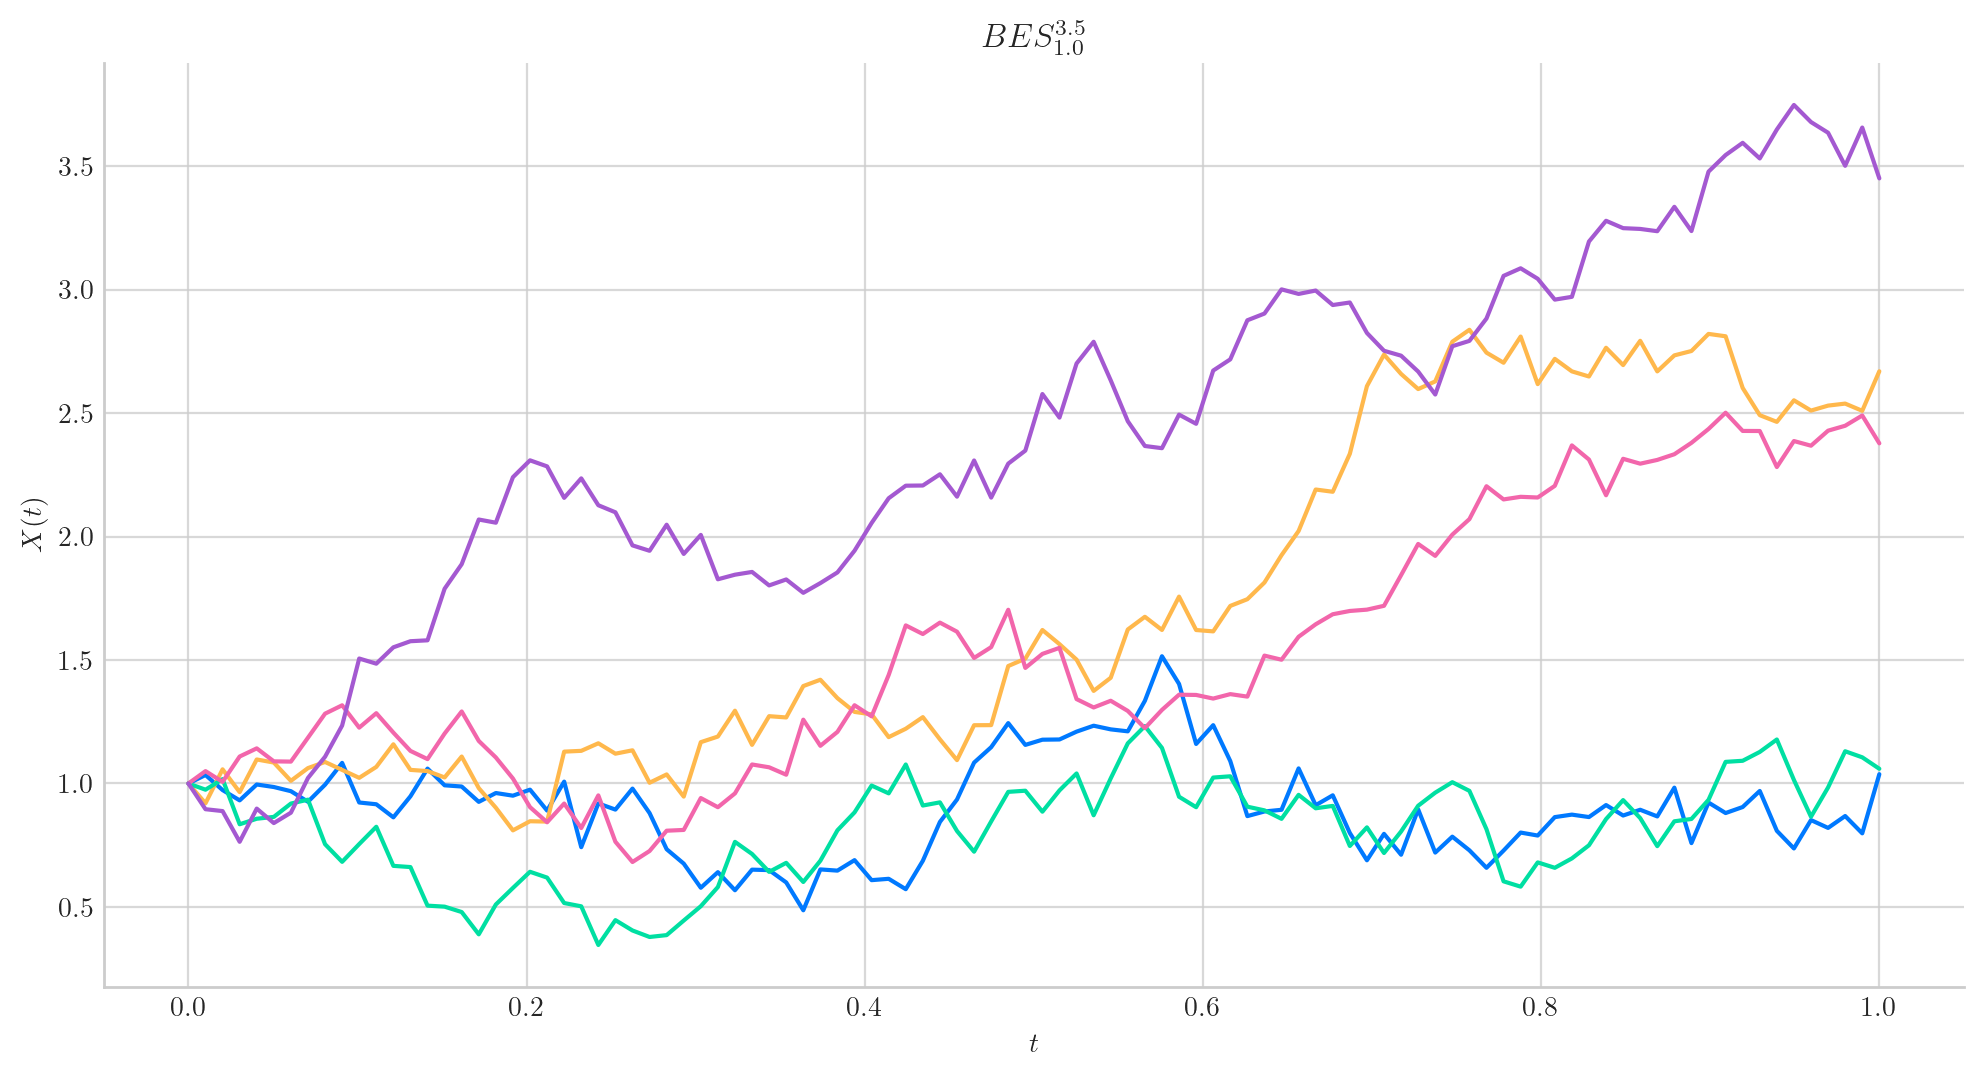

In [47]:
# Snippet to Simulate and Visualise the paths from the Bessel process
from aleatory.processes import BESProcess
bes = BESProcess(dim= 3.5, initial=1.0)
fig = bes.plot(n=100, N=5)

Similarly, let’s simulate 5 paths from a Squared Bessel process of dimension 6.5 and initial point 2.0, over the interval $[0,1]$ using a partition of 100 points.

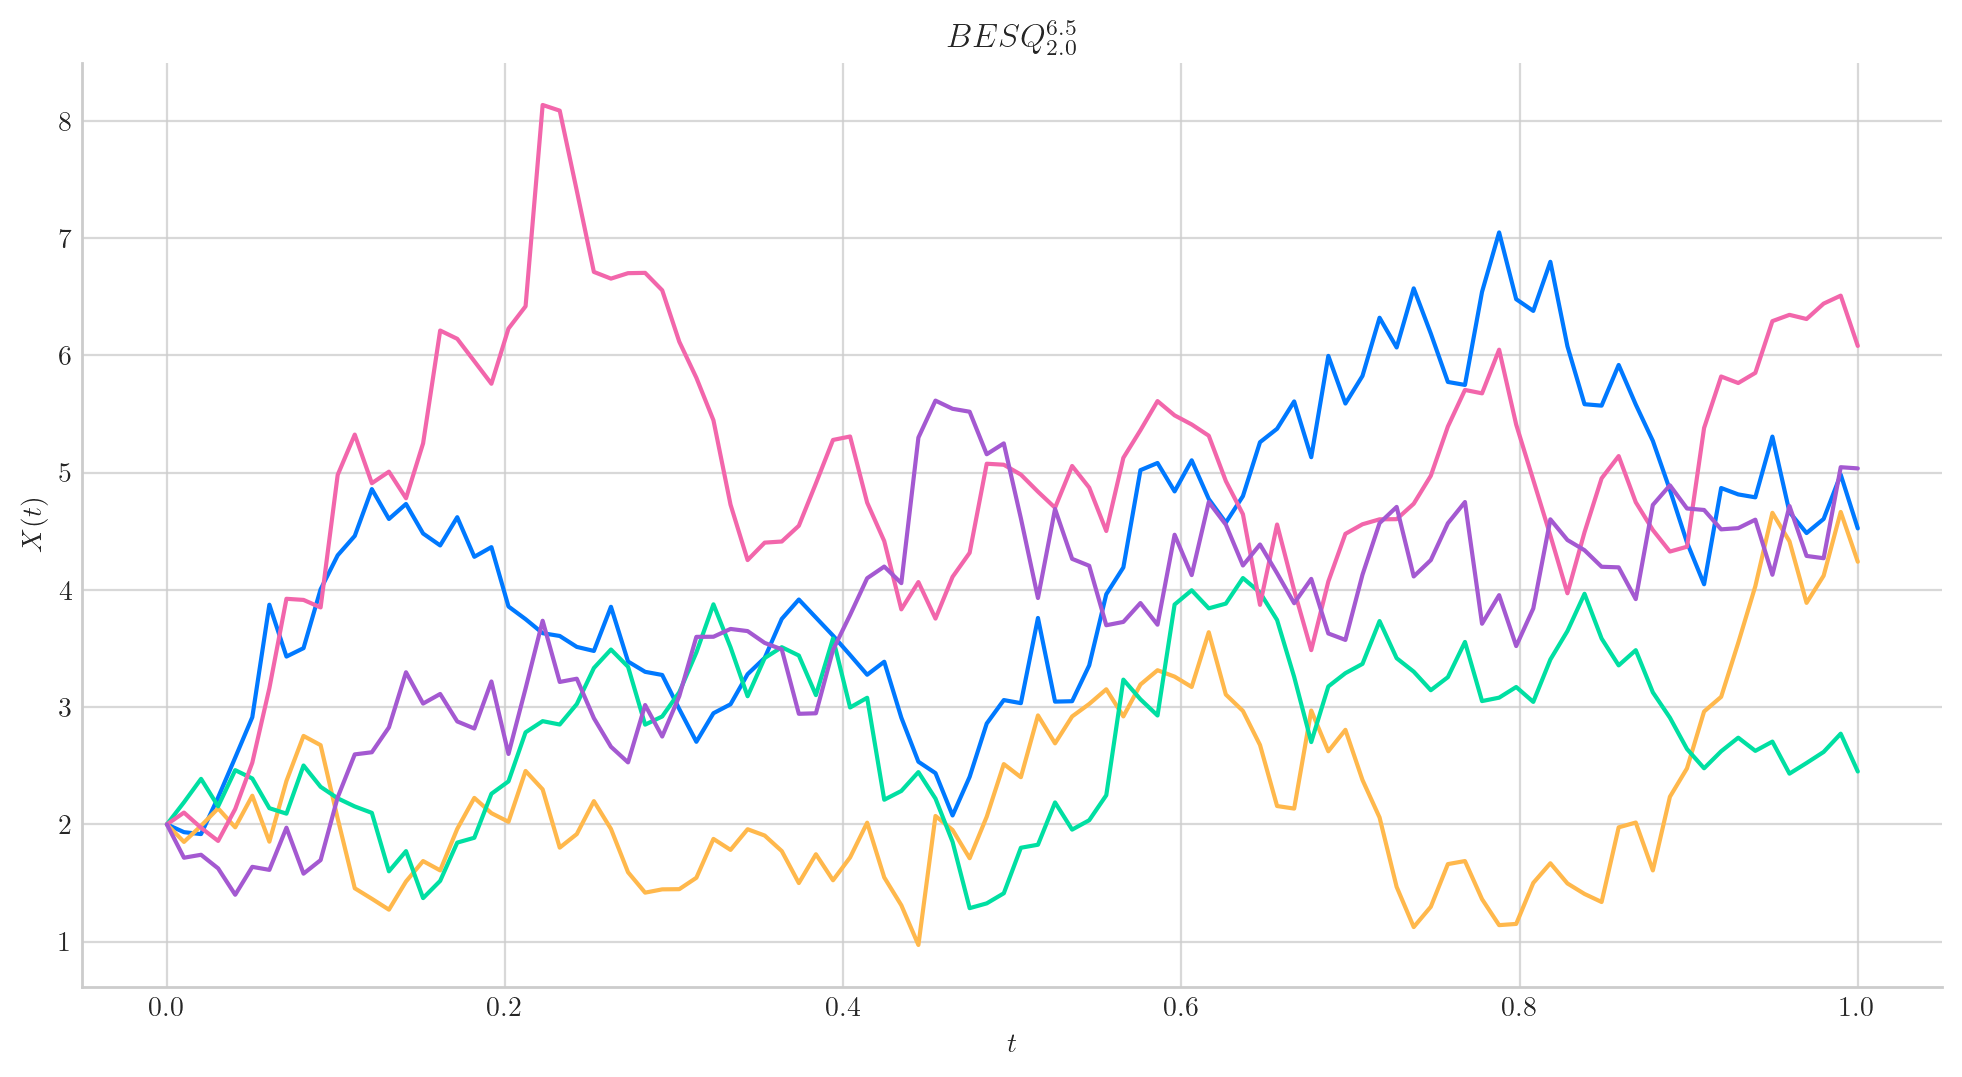

In [ ]:
# Snippet to Simulate and Visualise the paths from the Squared Bessel process
from aleatory.processes import BESQProcess
bes = BESQProcess(dim= 6.5, initial=2.0)
fig = bes.plot(n=100, N=5)

```{note}
In all plots we are using a linear interpolation to draw the lines between the simulated points. 
```

In the next section, we will see how to create more interesting visualisations!

## Final Visualisations

To finish this note, let us take a look at some simulations.

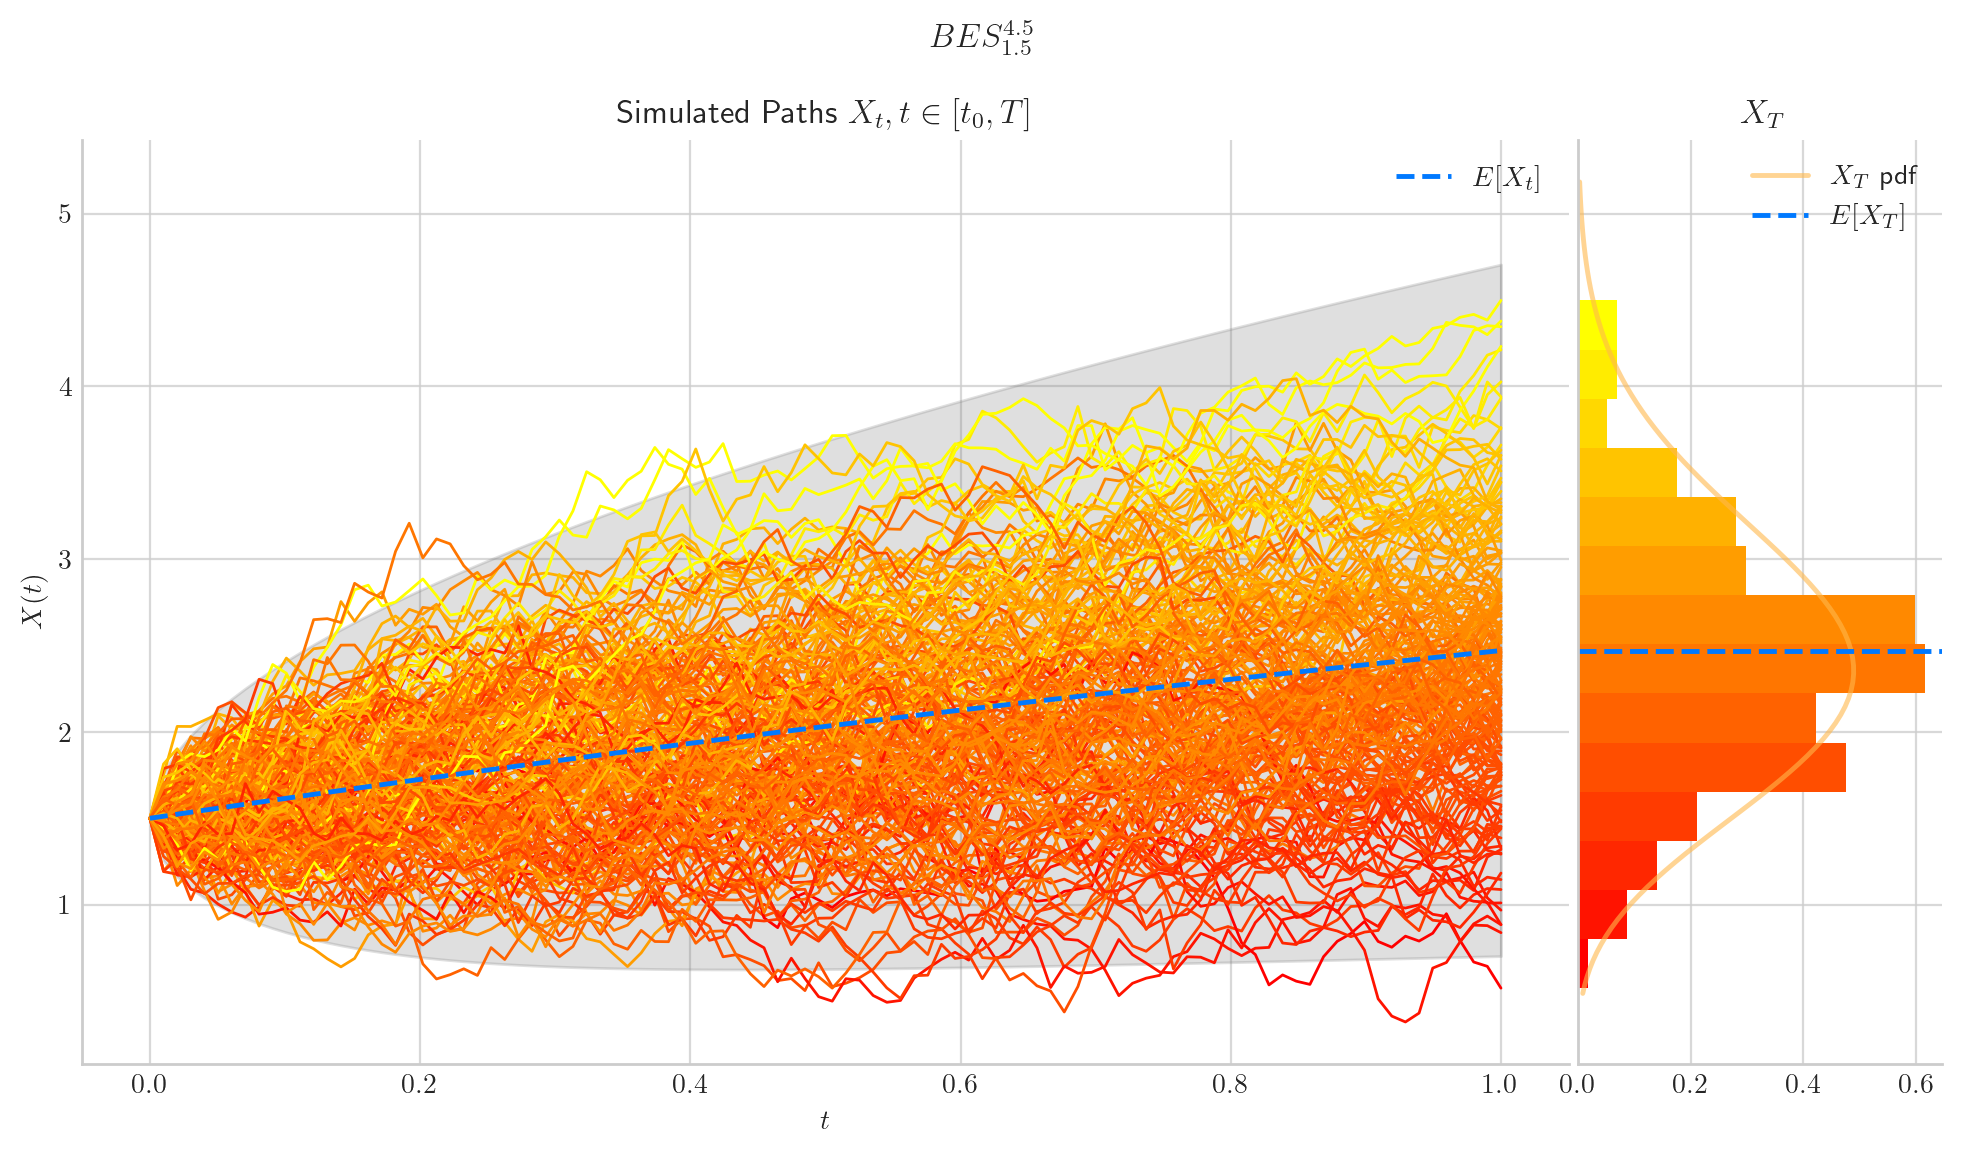

In [26]:
# from aleatory.processes import BESProcess
bes = BESProcess(dim=4.5, initial=1.5, T=1)
fig = bes.draw(n=100, N=200, envelope=True, colormap="autumn", figsize=(12,6))

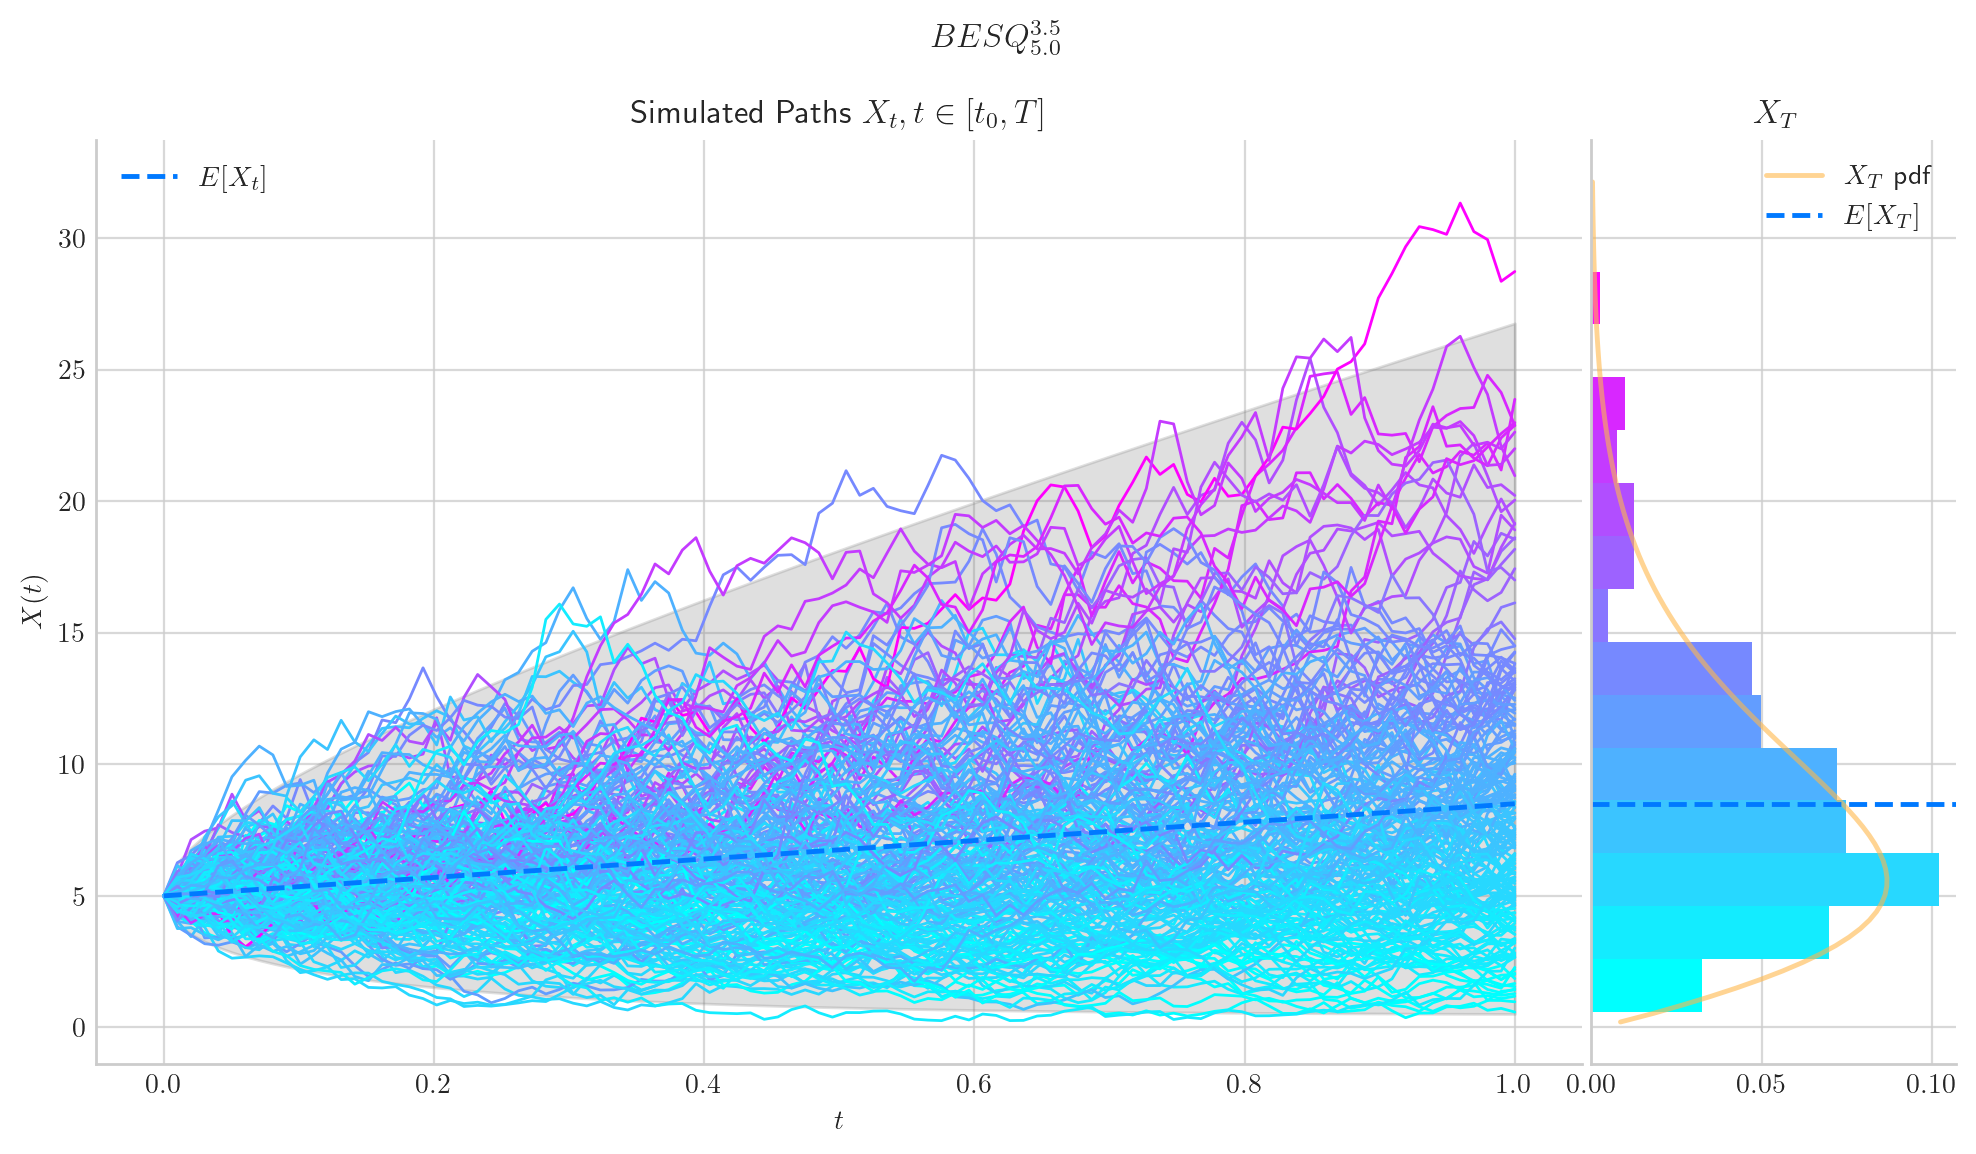

In [21]:
# from aleatory.processes import BESQProcess
bes = BESQProcess(dim=3.5, initial=5.0, T=1.0)
fig = bes.draw(n=100, N=200, envelope=True, colormap="cool")

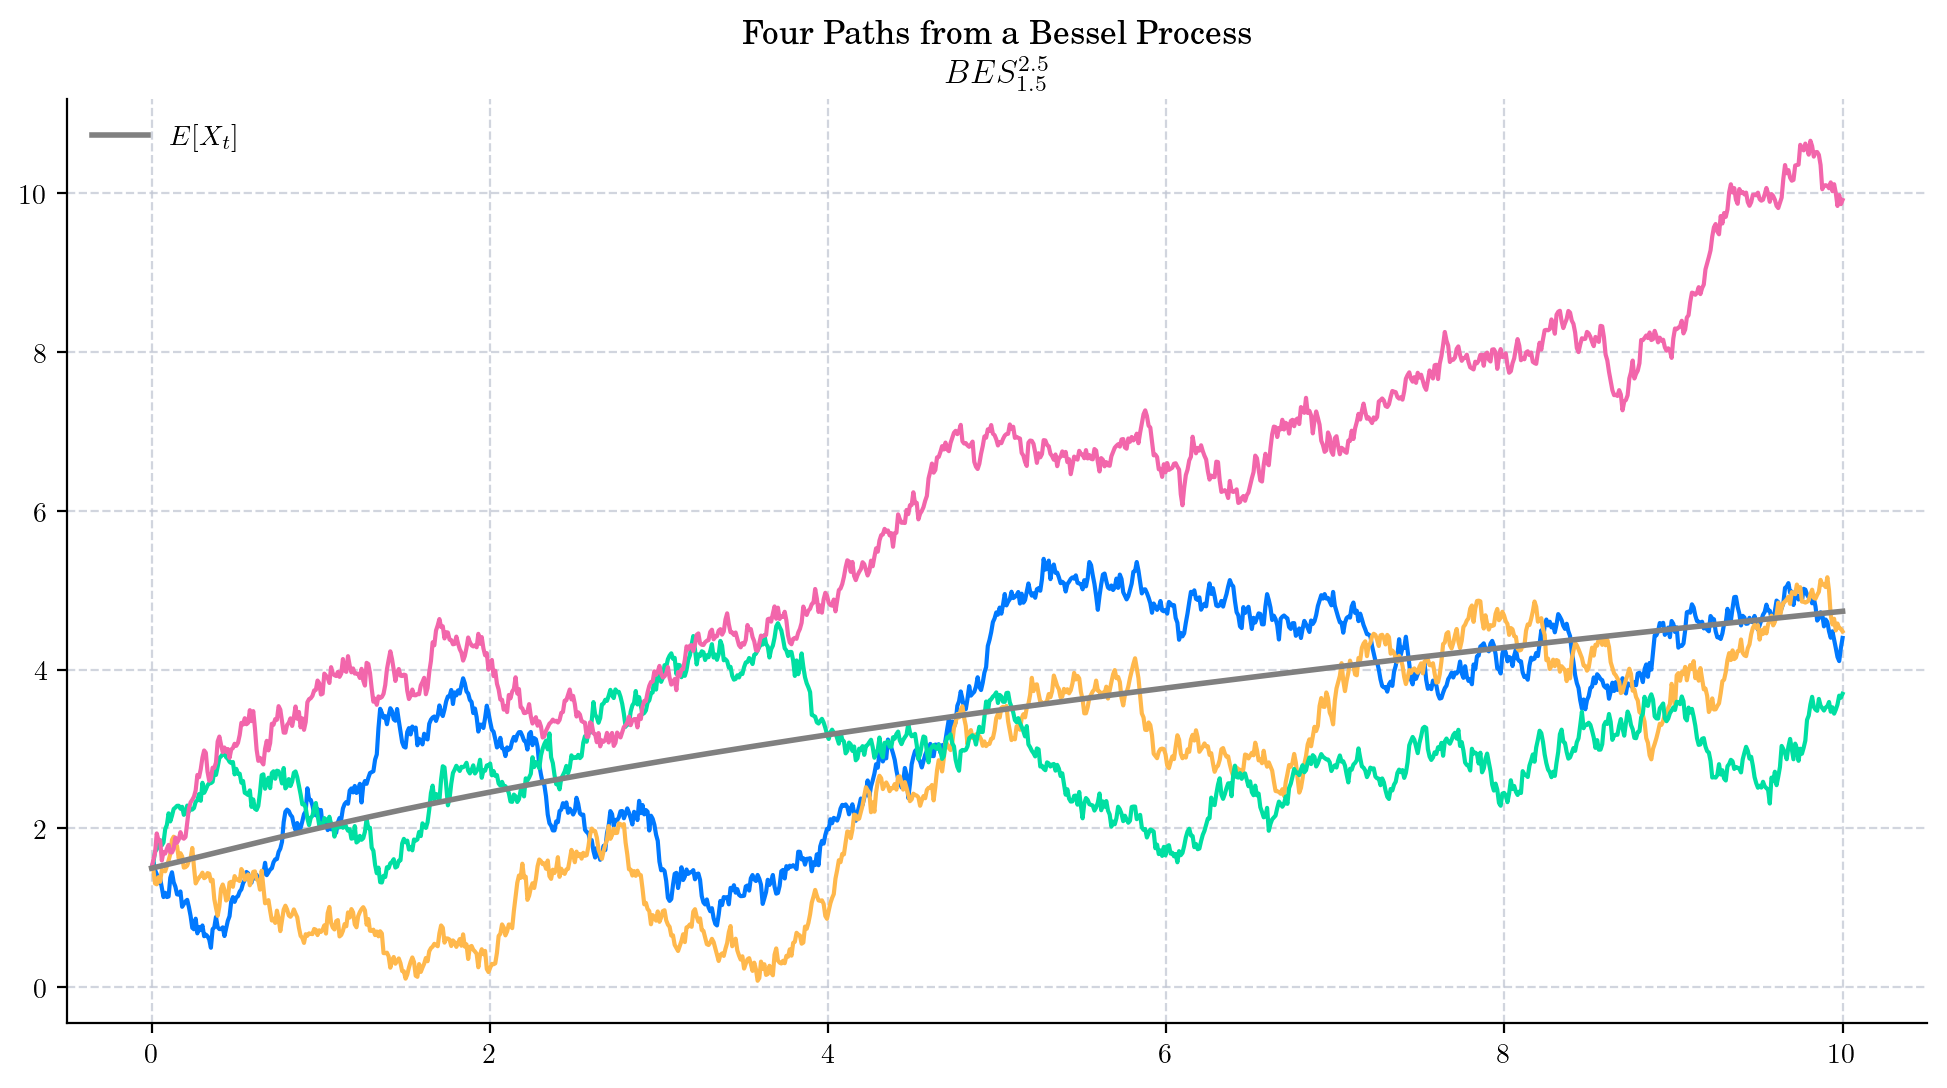

In [22]:
# from aleatory.processes import BESProcess
# import matplotlib.pyplot as plt
# import numpy as np
process = BESProcess(dim=2.5, initial=1.5, T=10, rng=np.random.default_rng(seed=1234))
paths = process.simulate(n=1000, N=4)
ts = process.times
exp = process.marginal_expectation(ts)

for path in paths:
    plt.plot(ts, path)
plt.plot(ts, exp, color='grey',linewidth=2, label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from a Bessel Process\n' + process.name)
plt.show()

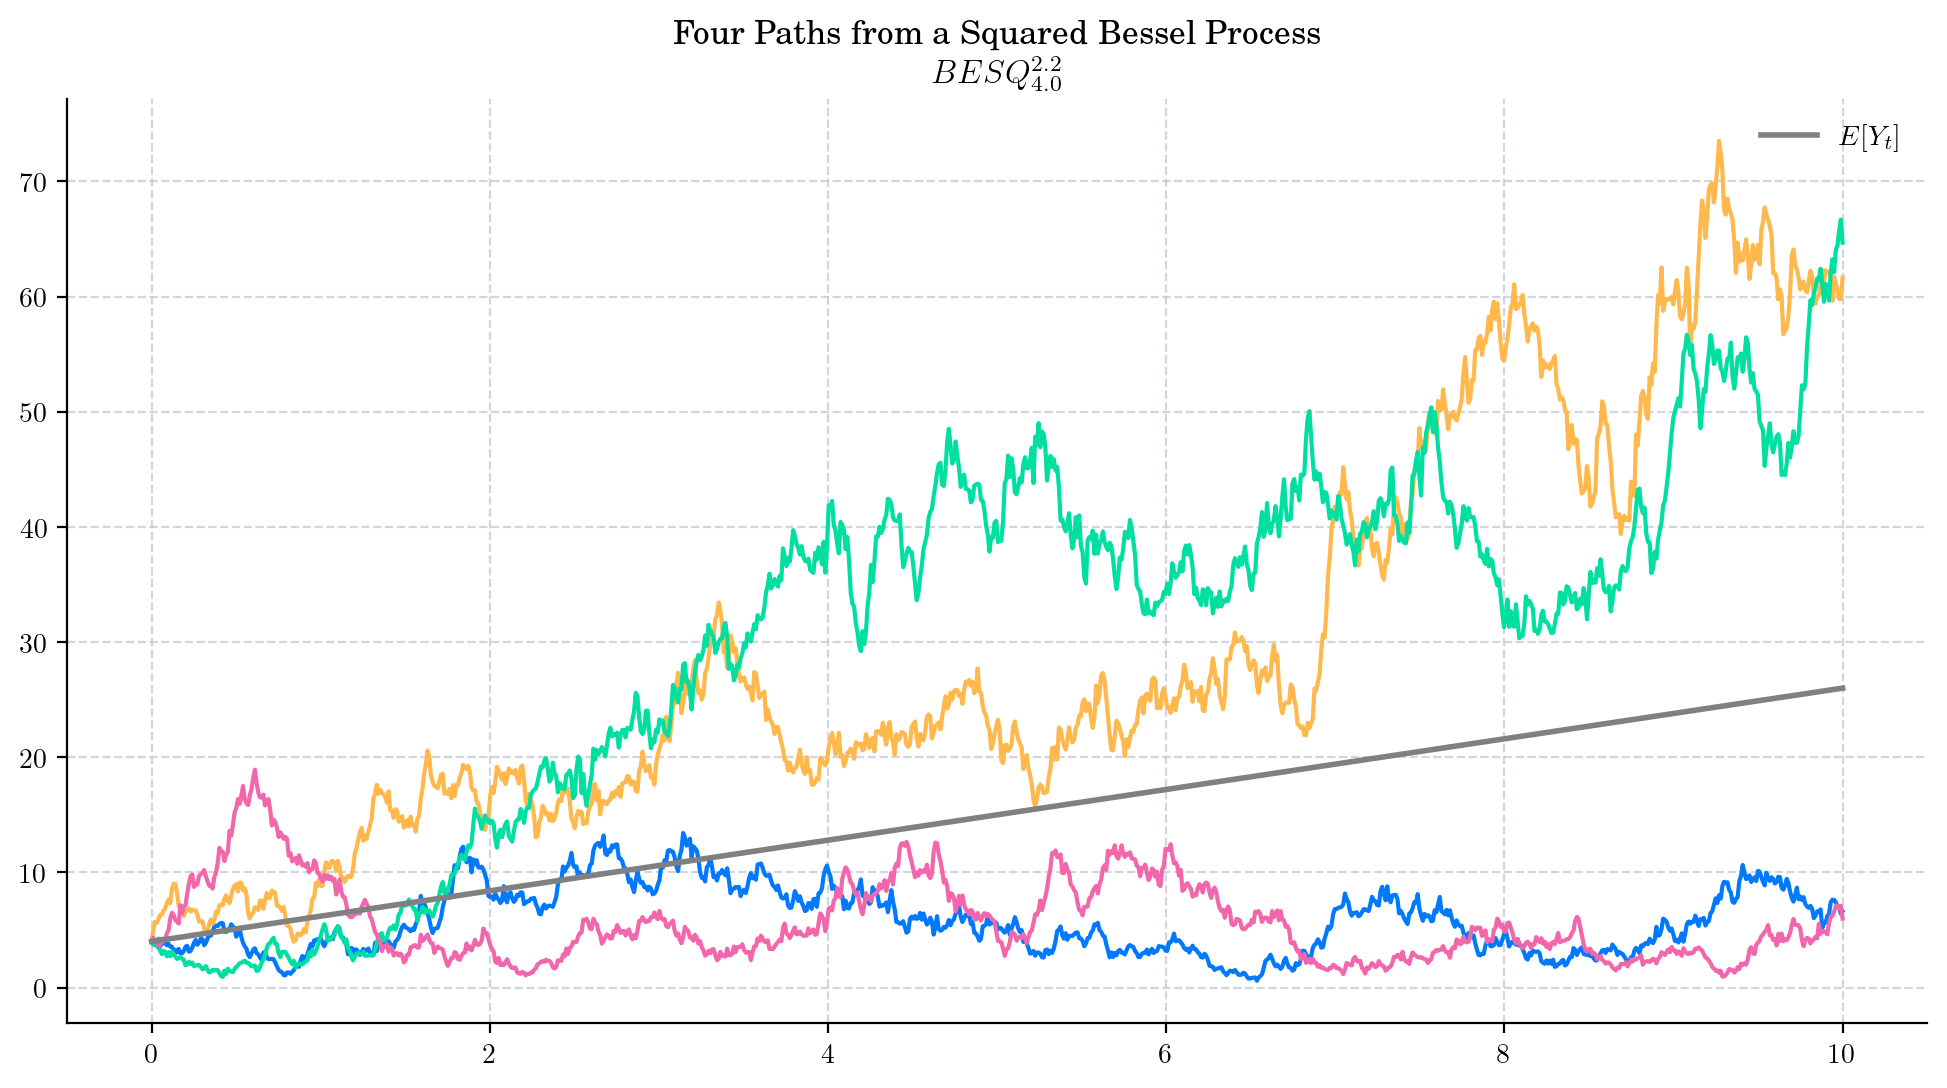

In [23]:
# from aleatory.processes import BESQProcess
# import matplotlib.pyplot as plt
# import numpy as np

process = BESQProcess(dim=2.2, initial=4.0, T=10, rng=np.random.default_rng(seed=12345))
paths = process.simulate(n=1000, N=4)
ts = process.times
exp = process.marginal_expectation(ts)

for path in paths:
    plt.plot(ts, path)
plt.plot(ts, exp, color='grey',linewidth=2, label=f'$E[Y_t]$')
plt.legend()
plt.title('Four Paths from a Squared Bessel Process\n' + process.name)
plt.show()